In [1]:
import pandas as pd
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pickle as pkl
from tqdm import tqdm

In [2]:
def load_processed_labels():
    """
    Load the processed labels from a pickle file.
    """
    data_path = "/data/laviniad/congress_errata/llm_outputs/biblical_reference.pkl"

    with open(data_path, 'rb') as f:
        processed_labels = pkl.load(f)

    return processed_labels

In [3]:
processed_labels = load_processed_labels()

# load congress df

In [4]:
import sys
sys.path.append('/home/laviniad/projects/religion_in_congress/')

In [5]:
from data import congress_utils

congressional_df = congress_utils.load_full_df_from_raw('/data/corpora/congressional-record/', remove_procedural_speeches=True)

[nltk_data] Downloading package punkt to /home/laviniad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


On file 0


100%|██████████| 106493/106493 [00:00<00:00, 165679.39it/s]


On file 1


100%|██████████| 190933/190933 [00:01<00:00, 166368.29it/s]


On file 2


100%|██████████| 94162/94162 [00:00<00:00, 204272.36it/s]


On file 3


100%|██████████| 207487/207487 [00:01<00:00, 194118.59it/s]


On file 4


100%|██████████| 183503/183503 [00:00<00:00, 197461.64it/s]


On file 5


100%|██████████| 130265/130265 [00:00<00:00, 203895.88it/s]


On file 6


100%|██████████| 197548/197548 [00:01<00:00, 195814.97it/s]


On file 7
On file 8
On file 9


100%|██████████| 139281/139281 [00:00<00:00, 203807.13it/s]


On file 10


100%|██████████| 127268/127268 [00:00<00:00, 200526.63it/s]


On file 11
On file 12


100%|██████████| 179989/179989 [00:01<00:00, 168676.17it/s]


On file 13
On file 14


100%|██████████| 271528/271528 [00:01<00:00, 190456.49it/s]


On file 15


100%|██████████| 48007/48007 [00:00<00:00, 214206.41it/s]


On file 16


100%|██████████| 210379/210379 [00:01<00:00, 195192.42it/s]


On file 17


100%|██████████| 196111/196111 [00:00<00:00, 197973.01it/s]


On file 18


100%|██████████| 122717/122717 [00:00<00:00, 200578.22it/s]


# load claude precision-boosting data

In [6]:
PATH = "/home/laviniad/"
SHINGLE_FILE = PATH + "results_shingles.csv"
EMBEDDING_FILE = PATH + "results_embeddings.csv"

# load csvs
df_shingles = pd.read_csv(SHINGLE_FILE)
df_embeddings = pd.read_csv(EMBEDDING_FILE)

TEST_SHINGLE = PATH + "results_test_shingles.csv"
TEST_EMBEDDING = PATH + "results_test_emb.csv"
test_shingles = pd.read_csv(TEST_SHINGLE)
test_embeddings = pd.read_csv(TEST_EMBEDDING)

In [6]:
test_embeddings['congress_idx'] = test_embeddings['congress_idx'].apply(lambda x: int(x.split('(')[1].split(')')[0]))

orig_baseline_path = PATH + "results_combined.csv"
orig_baseline = pd.read_csv(orig_baseline_path)

claude_on_emb_ngm_refs_path = "/data/laviniad/congress_errata/llm_outputs/biblical_reference_final.pkl"

with open(claude_on_emb_ngm_refs_path, 'rb') as f:
    claude_real_pls = pkl.load(f)
    claude_real_pls = claude_real_pls['20250503_175447']

print("Length of orig baseline: ", len(orig_baseline))
print("Length of claude real pls: ", len(claude_real_pls['df']))

Length of orig baseline:  1555
Length of claude real pls:  1555


In [7]:
final_df = claude_real_pls['df'].copy()
final_df.drop(columns=['text'], inplace=True)
final_df = pd.concat([final_df, orig_baseline], axis=1)
final_df = final_df.rename(columns={'verse': 'verse_llm', 'verse_citation': 'verse_baseline', 'label': 'label_llm'})

print("Length of claude real pls after concat: ", len(claude_real_pls['df']))

# print ones where label_llm is false!
final_df['label_llm'] = final_df['label_llm'].astype(bool)
for i, row in final_df.iterrows():
    if row['label_llm'] == False:
        print("Verse citation: ", row['verse_baseline'])
        print("Verse llm: ", row['verse_llm'])
        print("Label llm: ", row['label_llm'])
        print("Text: ", row['text'])
        print("\n")

Length of claude real pls after concat:  1555
Verse citation:  Philippians 3:14
Verse llm:  NOT VERSE
Label llm:  False
Text:  Always pressing towards the mark for the prize of the high calling of God in Christ Jesus, to better improve the craft of Christian ministry and discipleship, Rev.


Verse citation:  Philippians 3:14
Verse llm:  NOT VERSE
Label llm:  False
Text:  Always pressing towards the mark for the prize of the high calling of God in Christ Jesus, to better improve the craft of Christian ministry and discipleship, he became a catalytic leader in the National Baptist Congress of Christian Education, for many years served as President of the Congress of Christian Education for the General Missionary Baptist Convention of Georgia and ultimately served on the Executive Committee Board of the National Baptist Convention.


Verse citation:  Philippians 3:14
Verse llm:  NOT VERSE
Label llm:  False
Text:  Always pressing towards the mark for the prize of the high calling of God in

In [6]:
sys.path.append("/home/laviniad/projects/religion_in_congress/src/llm_experiments/postprocess_llm_outputs.py")
sys.path.append("/home/laviniad/projects/religion_in_congress")
from postprocess_llm_outputs import verse_correct, evaluate_compliance_and_metrics, load_all_annotations, calculate_metrics

reference_df, test_reference_df = load_all_annotations()

Test set size before removing val duplicates:  1029
Val set size before removing test duplicates:  150
Test set size before removing NA labels:  313
Test set size after removing NA labels:  136
Test set size before removing duplicates:  136
Test set size after removing duplicates:  136
Validation set size:  150
Columns in validation_df:  Index(['Unnamed: 0', 'congress_idx_dallas', 'original row', 'Round', 'rand',
       'text', 'Label_dallas', 'Notes_dallas', 'King James Bible_dallas',
       'American Standard Version_dallas', 'Douay-Rheims Bible_dallas',
       'Darby Bible Translation_dallas', 'English Revised Version_dallas',
       'Webster Bible Translation_dallas', 'World English Bible_dallas',
       'Young's Literal Translation_dallas',
       'American King James Version_dallas', '0_dallas', 'Match_dallas',
       'congress_idx_lavinia', 'Label_lavinia', 'Notes_lavinia',
       'King James Bible_lavinia', 'American Standard Version_lavinia',
       'Douay-Rheims Bible_lavinia

In [9]:
def get_ngm_label(idx):
    if int(idx) in test_shingles['congress_idx'].values:
        return True
    else:
        return False
    
def get_emb_label(idx):
    if int(idx) in test_embeddings['congress_idx'].values:
        return True
    else:
        return False

test_reference_df['ngm'] = test_reference_df['congress_idx'].apply(get_ngm_label).astype(bool)
test_reference_df['emb'] = test_reference_df['congress_idx'].apply(get_emb_label).astype(bool)
test_reference_df['emb_or_ngm'] = test_reference_df['ngm'] | test_reference_df['emb']
test_reference_df['emb_and_ngm'] = test_reference_df['ngm'] & test_reference_df['emb']

In [10]:
#sys.path.append("/home/laviniad/projects/religion_in_congress/src/llm_experiments/postprocess_llm_outputs.py")
import data.bible_utils as bible_utils

BIBLE_PATH = '/home/laviniad/projects/religion_in_congress/data/bibles/KJV.txt'

bible_df = bible_utils.bible_helper(INPUT_PATH=BIBLE_PATH)
text_verse_dict = {r.text.strip(): (str(r.book) + ' ' + str(r.chapter) + ':' + str(r.verse)).lower() for r in bible_df.itertuples()}
verse_list = [(str(r.book) + ' ' + str(r.chapter) + ':' + str(r.verse)).lower() for r in bible_df.itertuples()]

test_reference_df['correct_verse_citation'] = test_reference_df['verse_citation'].copy()
for idx, row in test_reference_df.iterrows():
    if row['King James Bible'] in text_verse_dict:
        if row['ngm'] and row['emb']:
            test_reference_df.at[idx, 'correct_verse_citation'] = text_verse_dict[row['King James Bible']]
        elif row['ngm']:
            test_reference_df.at[idx, 'correct_verse_citation'] = text_verse_dict[row['King James Bible']]
        elif row['emb']:
            test_reference_df.at[idx, 'correct_verse_citation'] = text_verse_dict[row['King James Bible']]
        else:
            test_reference_df.at[idx, 'correct_verse_citation'] = None
    else:
        test_reference_df.at[idx, 'correct_verse_citation'] = None
        print("Verse not found in text_verse_dict: ", row['King James Bible'])

In [8]:
processed_labels = evaluate_compliance_and_metrics(processed_labels, reference_df, get_baseline=False, precision_boost=False)

Evaluating metrics: 100%|██████████| 540/540 [00:29<00:00, 18.04it/s]


In [12]:
# find best claude --- best f1 --- in processed_labels
best_f1 = 0
best_f1_idx = 0
for timestamp, vals in processed_labels.items():

    if 'model' not in vals['log']:
        continue

    if 'claude' not in vals['log']['model']:
        continue
    if vals['f1_all'] > best_f1:
        best_f1 = vals['f1_all']
        best_f1_idx = timestamp
print("Best F1: ", best_f1)


Best F1:  0.9802333840690005


In [11]:
test_processed = "/data/laviniad/congress_errata/llm_outputs/biblical_reference_test.pkl"
with open(test_processed, 'rb') as f:
    test_processed = pkl.load(f)

test_processed = evaluate_compliance_and_metrics(test_processed, test_reference_df, precision_boost=True)

Evaluating metrics: 100%|██████████| 6/6 [00:00<00:00, 14.25it/s]

temp_df head
                                                text  \
0  For instance, if the Department receives infor...   
1  In other words, Congress brought them into the...   
2  We so often hear: And now three remain: faith,...   
3  Well, some Members voted for it, and it passed...   
4  I do not think he can make the case there is a...   

                 llm_response  llm_label            llm_verse  ground_truth  \
0        Not Verse\nNOT VERSE      False            NOT VERSE           0.0   
1        Not Verse\nNOT VERSE      False            NOT VERSE           1.0   
2  Verse\n1 Corinthians 13:13       True  1 Corinthians 13:13           1.0   
3        Not Verse\nNOT VERSE      False            NOT VERSE           0.0   
4        Not Verse\nNOT VERSE      False            NOT VERSE           0.0   

  correct_verse_citation  correct  response_compliant  verse_correct_loose  \
0         ephesians 4:29        1                True                 True   
1             john 

In [12]:
test_processed_only_compliant = {}
for timestamp, label_data_and_errata in tqdm(test_processed.items(), desc="Processing just compliant responses", total=len(test_processed)):
    if 'df' not in label_data_and_errata:
        continue
    df = label_data_and_errata['df'].copy()

    if 'label' not in df.columns:
        print("model is " + label_data_and_errata['log']['model'])
        print(df.columns)
        print("Label column not found in df")
        continue

    df_only_compliant_response = df[df['label'].notna() & df['ground_truth'].notna()]
    test_processed_only_compliant[timestamp] = label_data_and_errata
    test_processed_only_compliant[timestamp]['df'] = df_only_compliant_response
    gts = df_only_compliant_response['ground_truth'].apply(int).tolist()
    labels = df_only_compliant_response['label'].apply(int).tolist()

    f1, acc, precision, recall = calculate_metrics(labels, gts)

    test_processed_only_compliant[timestamp]['f1'] = f1
    test_processed_only_compliant[timestamp]['acc'] = acc
    test_processed_only_compliant[timestamp]['precision'] = precision
    test_processed_only_compliant[timestamp]['recall'] = recall
    test_processed_only_compliant[timestamp]['num_compliant_responses'] = len(df_only_compliant_response)
    test_processed_only_compliant[timestamp]['num_responses'] = len(df)
    test_processed_only_compliant[timestamp]['worked'] = len(df_only_compliant_response) != 0

Processing just compliant responses:   0%|          | 0/8 [00:00<?, ?it/s]

Processing just compliant responses: 100%|██████████| 8/8 [00:00<00:00, 142.28it/s]


In [13]:
# which false negatives does claude produce?

# get the false negatives
false_negatives = []
false_positives = []
true_negatives = []
true_positives = []
test_df = []
for timestamp, label_data_and_errata in tqdm(test_processed.items(), desc="Collecting false negatives", total=len(test_processed)):
    if 'df' not in label_data_and_errata:
        continue
    model = label_data_and_errata['log']['model']
    if 'claude' not in model or 'baseline' not in model:
        continue

    print("Looking at claude with baseline")
    df = label_data_and_errata['df']
    print(df.columns)
    df_only_compliant_response = df[df['label'].notna() & df['ground_truth'].notna()]
    for i, row in df_only_compliant_response.iterrows():
        if row['label'] == 0 and row['ground_truth'] == 1:
            false_negatives.append(row)
        elif row['label'] == 1 and row['ground_truth'] == 0:
            false_positives.append(row)

        elif row['label'] == 0 and row['ground_truth'] == 0:
            true_negatives.append(row)
        elif row['label'] == 1 and row['ground_truth'] == 1:
            true_positives.append(row)
        else:
            print("Error: ", row)
            raise ValueError("Error: ", row)
        test_df.append(row)

false_negatives_df = pd.DataFrame(false_negatives)
false_positives_df = pd.DataFrame(false_positives)
true_negatives_df = pd.DataFrame(true_negatives)
true_positives_df = pd.DataFrame(true_positives)
test_df = pd.DataFrame(test_df)

Looking at claude with baseline
Index(['congress_idx', 'original row', 'rand', 'text', 'Label', 'Notes',
       'King James Bible', 'American Standard Version', 'Douay-Rheims Bible',
       'Darby Bible Translation', 'English Revised Version',
       'Webster Bible Translation', 'World English Bible',
       'Young's Literal Translation', 'American King James Version', '0',
       'verse_citation', 'ground_truth', 'Round', 'random', 'ngm', 'emb',
       'base_label', 'emb_and_ngm', 'correct_verse_citation', 'llm_label',
       'llm_verse', 'label', 'verse', 'correct', 'label_zeroed'],
      dtype='object')


In [14]:
print("False negatives: ", len(false_negatives_df))
print("False positives: ", len(false_positives))
print("True negatives: ", len(true_negatives))
print("True positives: ", len(true_positives))

False negatives:  22
False positives:  0
True negatives:  102
True positives:  12


In [15]:
# function to get f1, precision, recall, and accuracy from false negs, false pos, true pos, true negs
print(calculate_metrics(test_df['label'].tolist(), test_df['ground_truth'].tolist()))
print(calculate_metrics(test_df['llm_label'].tolist(), test_df['ground_truth'].tolist()))
print(calculate_metrics(test_df['base_label'].tolist(), test_df['ground_truth'].tolist()))

(0.8074259330511735, 0.8382352941176471, 0.8669354838709677, 0.8382352941176471)
(0.9778303603931562, 0.9779411764705882, 0.9778611356281258, 0.9779411764705882)
(0.8074259330511735, 0.8382352941176471, 0.8669354838709677, 0.8382352941176471)


In [16]:
test_df['llm_label'].value_counts()

llm_label
False    103
True      33
Name: count, dtype: int64

In [17]:
test_df['base_label'].value_counts()

base_label
False    124
True      12
Name: count, dtype: int64

In [18]:
test_df['ground_truth'].value_counts()

ground_truth
0    102
1     34
Name: count, dtype: int64

In [19]:
test_df[test_df['ground_truth'] != test_df['llm_label']]

,congress_idx,original row,rand,text,Label,Notes,King James Bible,American Standard Version,Douay-Rheims Bible,Darby Bible Translation,...,emb,base_label,emb_and_ngm,correct_verse_citation,llm_label,llm_verse,label,verse,correct,label_zeroed
1,74111,NaN,NaN,"In other words, Congress brought them into the...",Match,Very tough case! More of an echo than a direct...,I pray not that thou shouldest take them out o...,I pray not that thou shouldest take them from ...,I pray not that thou shouldst take them out of...,I do not demand that thou shouldest take them ...,...,False,False,False,None,False,NOT VERSE,0,NOT VERSE,False,0
18,2237072,NaN,NaN,"When the Lord called and said, who will go for...",Match,NaN,"Also I heard the voice of the Lord, saying, Wh...","And I heard the voice of the Lord, saying, Who...","And I heard the voice of the Lord, saying: Who...","And I heard the voice of the Lord saying, Whom...",...,False,False,False,None,False,NOT VERSE,0,NOT VERSE,False,0
45,1879440,NaN,NaN,"Doctor Harry Emerson Fosdick, the legendary Ba...",Not Match,NaN,Now faith is the substance of things hoped for...,"Now faith is assurance of things hoped for, a ...",Now faith is the substance of things to be hop...,Now faith is the substantiating of things hope...,...,False,False,False,None,True,Psalm 19:1,0,Psalm 19:1,True,0


In [20]:
test_df[test_df['ground_truth'] != test_df['base_label']]

,congress_idx,original row,rand,text,Label,Notes,King James Bible,American Standard Version,Douay-Rheims Bible,Darby Bible Translation,...,emb,base_label,emb_and_ngm,correct_verse_citation,llm_label,llm_verse,label,verse,correct,label_zeroed
1,74111,NaN,NaN,"In other words, Congress brought them into the...",Match,Very tough case! More of an echo than a direct...,I pray not that thou shouldest take them out o...,I pray not that thou shouldest take them from ...,I pray not that thou shouldst take them out of...,I do not demand that thou shouldest take them ...,...,False,False,False,None,False,NOT VERSE,0,NOT VERSE,False,0
2,619954,NaN,NaN,"We so often hear: And now three remain: faith,...",Match,NaN,"And now abideth faith, hope, charity, these th...","But now abideth faith, hope, love, these three...","And now there remain faith, hope, and charity,...","And now abide faith, hope, love; these three t...",...,False,False,False,None,True,1 Corinthians 13:13,0,1 Corinthians 13:13,False,0
12,589223,NaN,NaN,"Lastly, might I say I believe that we will sur...",Other Bible Verse,Isaiah 40:31,"And it shall come to pass, that whosoever shal...","And it shall be, that whosoever shall call on ...","And it shall come to pass, that whosoever shal...",And it shall be that whosoever shall call upon...,...,False,False,False,None,True,Isaiah 40:31,0,Isaiah 40:31,False,0
14,2347796,NaN,NaN,"Doug has told him Jesus said: ``I am the way, ...",Match,NaN,"Jesus saith unto him, I am the way, the truth,...","Jesus saith unto him, I am the way, and the tr...","Jesus saith to him: I am the way, and the trut...","Jesus says to him, I am the way, and the truth...",...,False,False,False,None,True,John 14:6,0,John 14:6,False,0
18,2237072,NaN,NaN,"When the Lord called and said, who will go for...",Match,NaN,"Also I heard the voice of the Lord, saying, Wh...","And I heard the voice of the Lord, saying, Who...","And I heard the voice of the Lord, saying: Who...","And I heard the voice of the Lord saying, Whom...",...,False,False,False,None,False,NOT VERSE,0,NOT VERSE,False,0
23,537132,NaN,NaN,"I take comfort in Matthew, Chapter 6 and Verse...",Match,NaN,"But thou, when thou prayest, enter into thy cl...","But thou, when thou prayest, enter into thine ...","But thou when thou shalt pray, enter into thy ...","But thou, when thou prayest, enter into thy ch...",...,False,False,False,None,True,Matthew 6:6,0,Matthew 6:6,False,0
30,699658,NaN,NaN,Repeating the first question that was ever ask...,Match,NaN,And they heard the voice of the LORD God walki...,And they heard the voice of Jehovah God walkin...,And when they heard the voice of the Lord God ...,"And they heard the voice of Jehovah Elohim, wa...",...,False,False,False,None,True,Genesis 3:8,0,Genesis 3:8,False,0
50,343685,NaN,NaN,They have fulfilled the biblical directive fou...,Match,NaN,"He hath shewed thee, O man, what is good; and ...","He hath showed thee, O man, what is good; and ...","I will shew thee, O man, what is good, and wha...","He hath shewn thee, O man, what is good: and w...",...,False,False,False,None,True,Micah 6:8,0,Micah 6:8,False,0
53,197202,NaN,NaN,"The President said: ``As we have been assured,...",Match,NaN,"For I am persuaded, that neither death, nor li...","For I am persuaded, that neither death, nor li...","For I am sure that neither death, nor life, no...","For I am persuaded that neither death, nor lif...",...,False,False,False,None,True,Romans 8:38-39,0,Romans 8:38-39,False,0
54,1886979,NaN,NaN,Psalm 103 says that ``our days are few and bri...,Match,NaN,"The grass withereth, the flower fadeth: but th...","The grass withereth, the flower fadeth; but th...","The grass is withered, and the flower is falle...","The grass withereth, the flower fadeth; but th...",...,False,False,False,None,True,Psalm 103:15-16,0,Psalm 103:15-16,False,0


In [21]:
# print instances of test_df where claude and baseline disagree
count = 0
for i, row in test_df.iterrows():
    if row['base_label'] != row['llm_label']:
        count += 1
        print("Verse citation: ", row['verse_citation'])
        #print("Verse llm: ", row['verse_llm'])
        print("Base label: ", row['base_label'])
        print("Label llm: ", row['llm_label'])
        print("Text: ", row['text'])
        print("\n")

print("Count of disagreements: ", count)

Verse citation:  1 corinthians 13:13
Base label:  False
Label llm:  True
Text:  We so often hear: And now three remain: faith, hope, and love.


Verse citation:  acts 2:21
Base label:  False
Label llm:  True
Text:  Lastly, might I say I believe that we will survive this together as a Nation and we will do this if we let constitutional principals guide us for Isaiah 40:31 says, ``They that wait upon the Lord shall renew their strength.


Verse citation:  john 14:6
Base label:  False
Label llm:  True
Text:  Doug has told him Jesus said: ``I am the way, the truth, and the life.


Verse citation:  matthew 6:6
Base label:  False
Label llm:  True
Text:  I take comfort in Matthew, Chapter 6 and Verse 6, ``and when thou prayest, pray to thy father in private and he shall hear you.''


Verse citation:  genesis 3:8
Base label:  False
Label llm:  True
Text:  Repeating the first question that was ever asked in the history of mankind when God sought Adam in the Garden of Eden in the cool of the day

# plot test data f1 and compliance for all llms, baseline, and baseline with claude

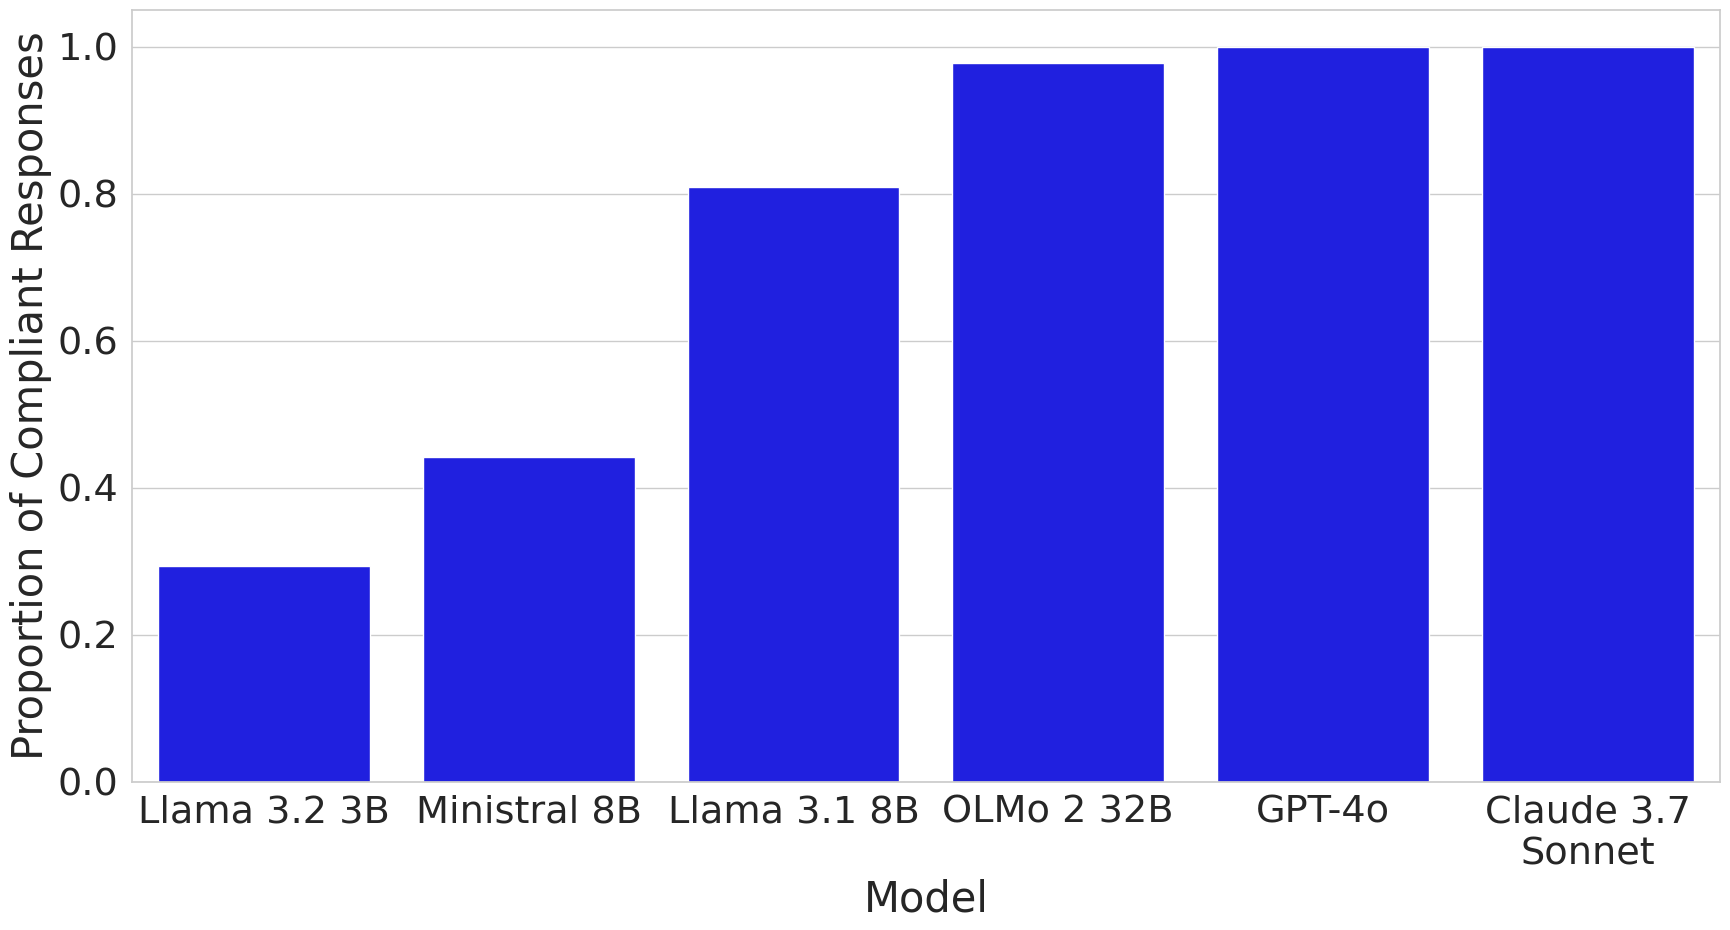

Model:  meta-llama/Llama-3.1-8B-Instruct
Number of compliant responses:  110
Number of responses:  136
Model:  allenai/OLMo-2-0325-32B-Instruct
Number of compliant responses:  133
Number of responses:  136
Model:  gpt-4o-2024-08-06
Number of compliant responses:  136
Number of responses:  136
Model:  claude-3-7-sonnet-20250219
Number of compliant responses:  136
Number of responses:  136
Model:  baseline
Number of compliant responses:  136
Number of responses:  136
Model:  baseline_with_claude
Number of compliant responses:  136
Number of responses:  136
                   model     metric     value
0           Llama 3.1 8B         F1  0.835770
1           Llama 3.1 8B  Precision  0.845379
2           Llama 3.1 8B     Recall  0.830882
3             OLMo 2 32B         F1  0.917837
4             OLMo 2 32B  Precision  0.917742
5             OLMo 2 32B     Recall  0.919118
6                 GPT-4o         F1  0.969952
7                 GPT-4o  Precision  0.971698
8                 GPT-4o 

/tmp/ipykernel_2829674/460816892.py:77: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=df, y="model", x="value", hue="metric", palette=metric_dict, join=False, alpha=0.6)


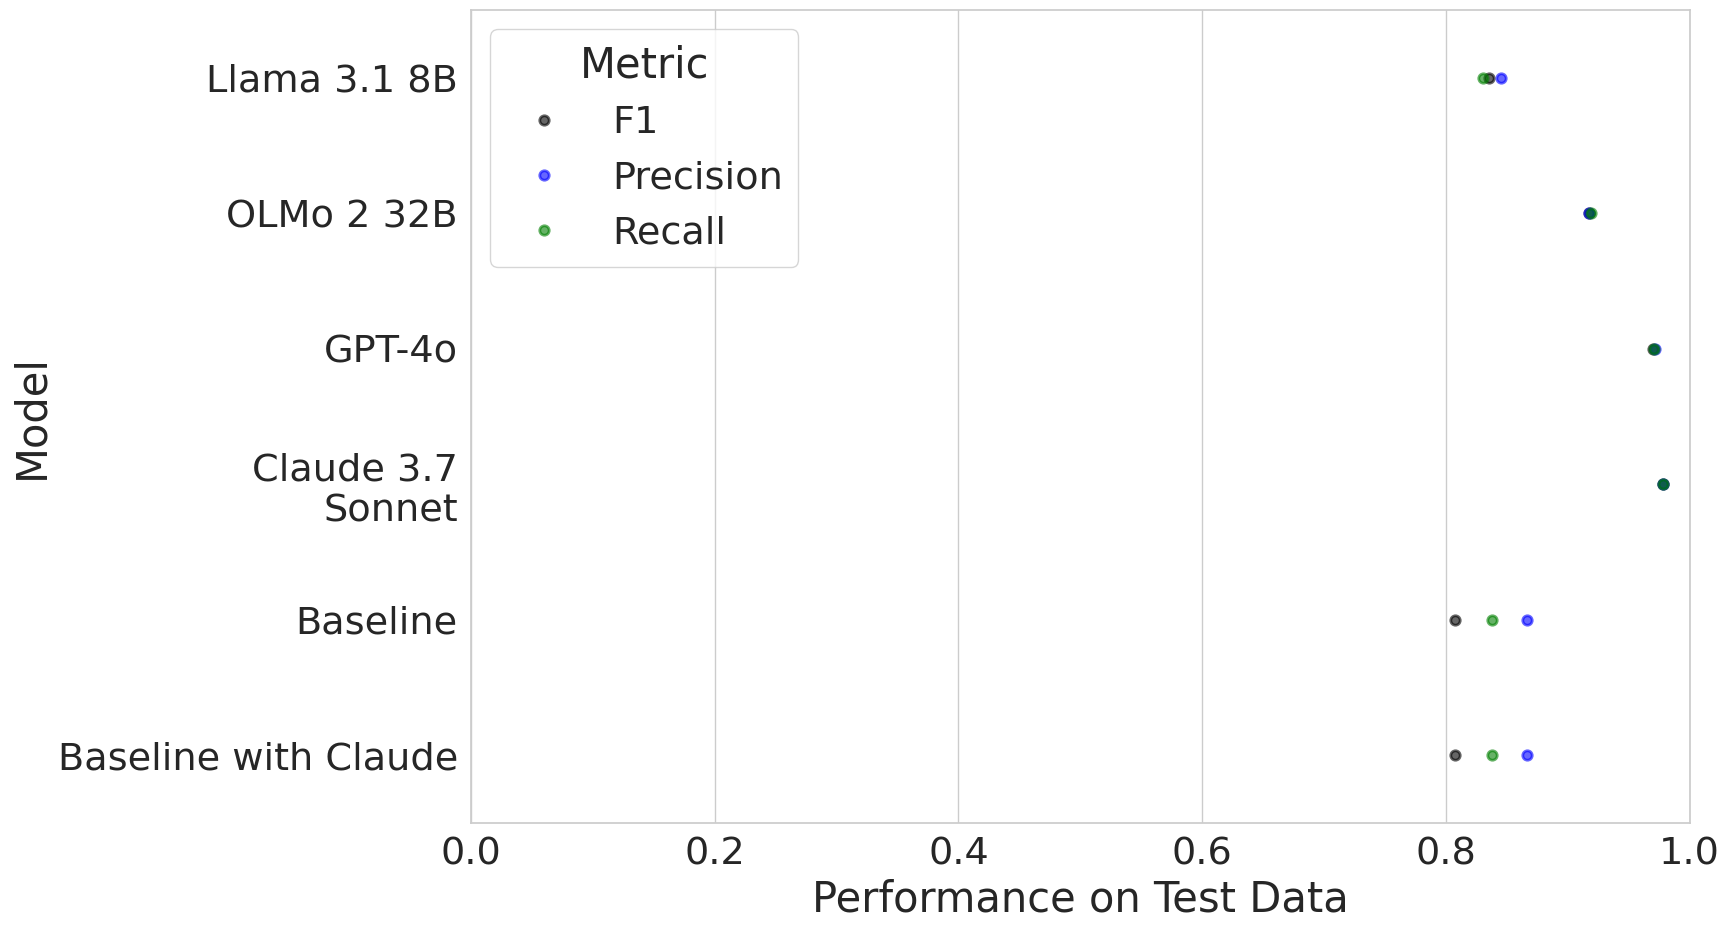

In [22]:
# make two plots: f1 and compliance. make compliance plot first, then f1 plot; don't include models with > 0.5 compliance.
palette = {'Democrat': 'blue', 'Republican': 'red', 'New Progressive': 'grey', 'Popular Democrat': 'grey', 'Independence Party (Minnesota)': 'grey', 'Anti-Jacksonian': 'grey', 'Independent': 'green', 'unknown': 'black', 'Democrat Farmer Labor': 'blue'}
sns.set(context="notebook", font_scale=2.5, rc={'figure.figsize':(18,10), 'font.weight': 'normal'}, style='whitegrid')

model_dict = {'baseline_with_claude': 'Baseline with Claude',
              'baseline': 'Baseline',
              'meta-llama/Llama-3.1-8B-Instruct': 'Llama 3.1 8B',
              'meta-llama/Llama-3.2-3B-Instruct': 'Llama 3.2 3B',
              'claude-3-7-sonnet-20250219': 'Claude 3.7\nSonnet',
              'gpt-4o-2024-08-06': 'GPT-4o',
              'mistralai/Ministral-8B-Instruct-2410': 'Ministral 8B',
              'allenai/OLMo-2-0325-32B-Instruct': 'OLMo 2 32B',
              }


def map_model_names(model_name):
    return model_dict.get(model_name, model_name)


def plot_compliance(tpls):
    model_names = []
    compliances = []
    for k, v in tpls.items():
        if 'df' not in v or 'baseline' in v['log']['model']:
            continue
        compliances.append(v['num_compliant_responses'] / v['num_responses'])
        model_names.append(map_model_names(v['log']['model']))
    
    #plt.figure(figsize=(8, 7))
    #sns.barplot(y=model_names, x=compliances, , palette="viridis")
    # order by compliance
    sorted_indices = np.argsort(compliances)
    sorted_model_names = [model_names[i] for i in sorted_indices]
    sorted_compliances = [compliances[i] for i in sorted_indices]
    sns.barplot(x=sorted_model_names, y=sorted_compliances, color="blue")
    plt.xlabel('Model')
    plt.ylabel('Proportion of Compliant Responses')
    plt.tight_layout()
    plt.savefig('/home/laviniad/projects/religion_in_congress/plots/biblical_reference_compliance.pdf', bbox_inches='tight', dpi=300)
    plt.show()


def plot_f1_precision_recall(tpls):
    records = []

    for k, v in tpls.items():
        if 'df' not in v:
            continue
        if v['num_compliant_responses'] / v['num_responses'] < 0.6:
            continue

        print("Model: ", v['log']['model'])
        print("Number of compliant responses: ", v['num_compliant_responses'])
        print("Number of responses: ", v['num_responses'])

        model_name = map_model_names(v['log']['model'])

        if 'f1_all' in v.keys():
            records.extend([
                {"model": model_name, "metric": "F1", "value": v["f1_all"]},
                {"model": model_name, "metric": "Precision", "value": v["precision_all"]},
                {"model": model_name, "metric": "Recall", "value": v["recall_all"]}
            ])
        else:
            records.extend([
                {"model": model_name, "metric": "F1", "value": v["f1"]},
                {"model": model_name, "metric": "Precision", "value": v["precision"]},
                {"model": model_name, "metric": "Recall", "value": v["recall"]}
            ])

    df = pd.DataFrame(records)
    metric_dict = {'F1': 'black', 'Precision': 'blue', 'Recall': 'green'}
    print(df)

    #plt.figure(figsize=(10, 5))
    # make markers somewhat transparent
    sns.pointplot(data=df, y="model", x="value", hue="metric", palette=metric_dict, join=False, alpha=0.6)
    plt.ylabel('Model')
    plt.xlabel('Performance on Test Data')
    plt.legend(title='Metric', loc='upper left')
    plt.xlim(0, 1)
    plt.tight_layout()
    plt.savefig('/home/laviniad/projects/religion_in_congress/plots/biblical_reference_f1_precision_recall.pdf', bbox_inches='tight', dpi=300)
    plt.show()


plot_compliance(test_processed)
plot_f1_precision_recall(test_processed_only_compliant)

# plot verse accuracy

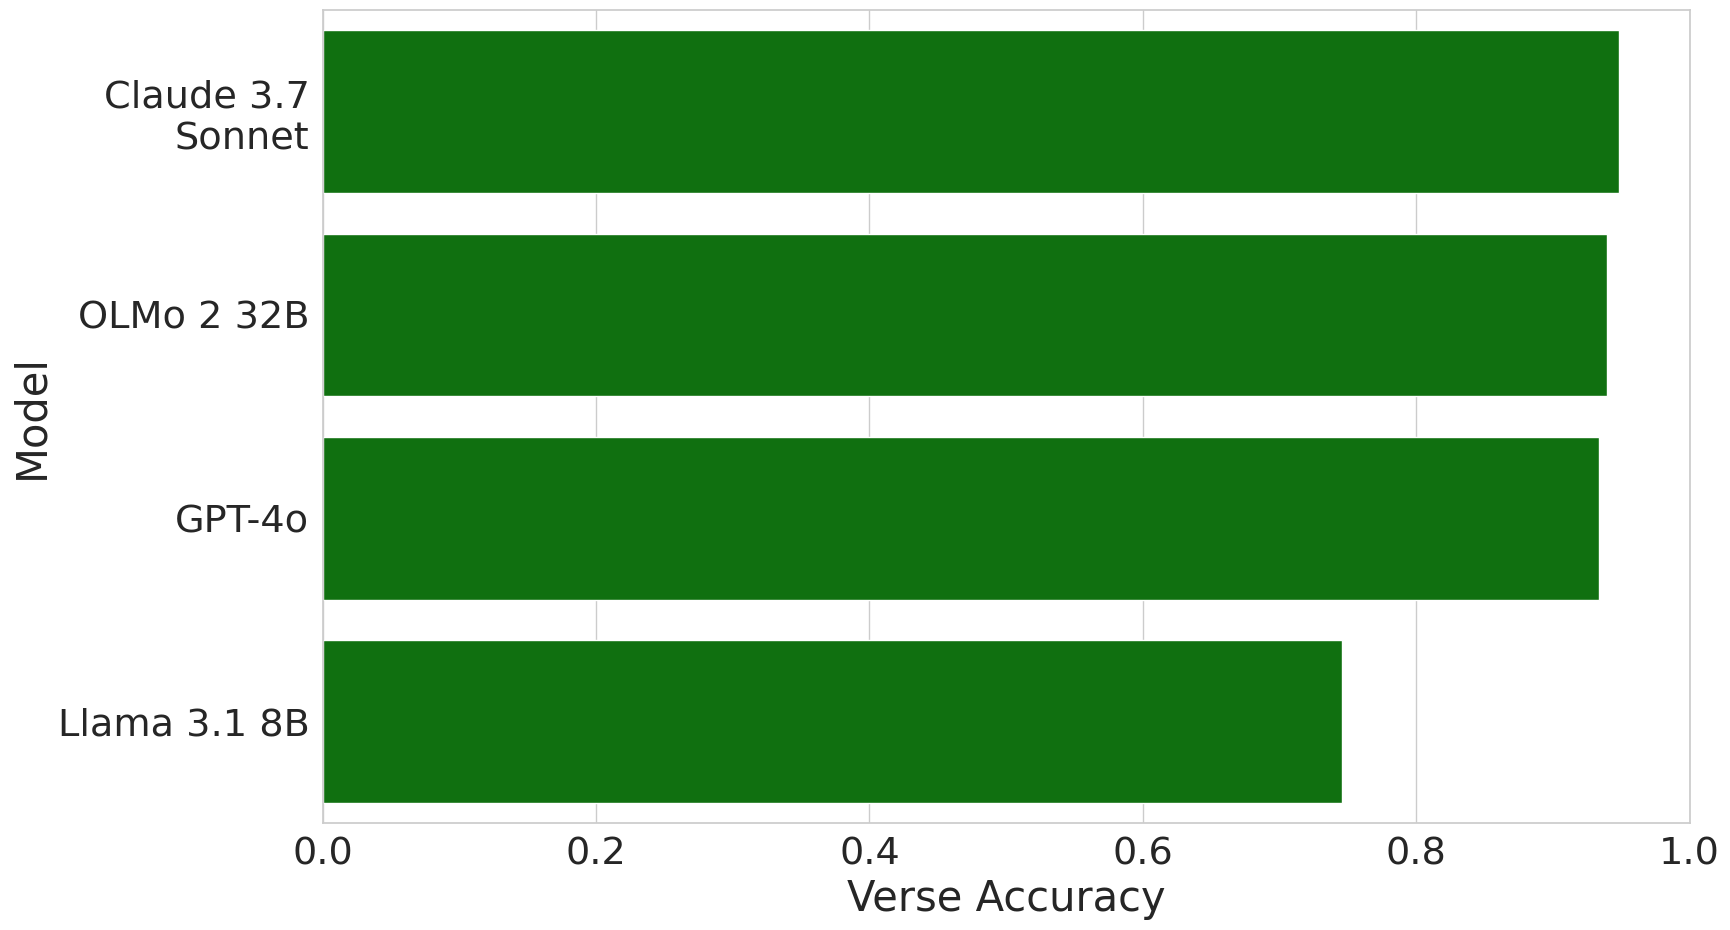

In [26]:
# within compliant responses, how many verse labels are correct?
# a verse label is correct if the verse citation matches the verse citation in the reference df OR if the verse is correctly identified as not a reference


def get_verse_accuracy(tpls):
    records = []
    for k, v in tpls.items():
        if 'df' not in v or 'baseline' in v['log']['model']:
            continue
        if v['num_compliant_responses'] / v['num_responses'] < 0.6:
            continue

        model_name = map_model_names(v['log']['model'])
        df = v['df']

        verse_accuracy = df['verse_correct_loose'].sum() / len(df)
        records.append({"model": model_name, "verse_accuracy": verse_accuracy})

    return pd.DataFrame(records)

def plot_verse_accuracy(verse_accuracy_df):
    #plt.figure(figsize=(10, 4))

    verse_accuracy_df = verse_accuracy_df.sort_values(by="verse_accuracy", ascending=False)
    sns.barplot(data=verse_accuracy_df, y="model", x="verse_accuracy", color="green")
    plt.ylabel('Model')
    plt.xlabel('Verse Accuracy')
    plt.xlim(0, 1)
    plt.tight_layout()
    plt.savefig('/home/laviniad/projects/religion_in_congress/plots/biblical_reference_verse_accuracy.pdf', bbox_inches='tight', dpi=300)
    plt.show()

#verse_accuracy_df = get_verse_accuracy(test_processed_only_compliant)

verse_accuracy_df = get_verse_accuracy(test_processed)
plot_verse_accuracy(verse_accuracy_df)

# more exploration

In [ ]:
# within json_pls, plot compliance #s for each model
import matplotlib.pyplot as plt
import seaborn as sns

json_pls = {}
for timestamp, label_data_and_errata in processed_labels.items():
    if 'log' in label_data_and_errata:
        format = label_data_and_errata['log']['prompt_metadata']['json_format']
        if format:
            json_pls[timestamp] = label_data_and_errata


def plot_compliance(json_pls):
    compliance_data = []
    for timestamp, label_data_and_errata in json_pls.items():

        if 'log' not in label_data_and_errata:
            continue

        model_name = label_data_and_errata['log']['model']
        if 'gpt' in model_name or 'claude' in model_name or 'OLMo' in model_name:
            compliance_data.append({
                'timestamp': timestamp,
                'model_name': model_name,
                'compliance': label_data_and_errata['worked'] if 'worked' in label_data_and_errata else True,
                'f1': label_data_and_errata['f1'],
                'acc': label_data_and_errata['acc'],
                'precision': label_data_and_errata['precision'],
                'recall': label_data_and_errata['recall'],
            })

    compliance_df = pd.DataFrame(compliance_data)

    plt.figure(figsize=(10, 6))
    sns.barplot(y='model_name', x='compliance', data=compliance_df)
    plt.title('Compliance of Models with JSON Format')
    plt.ylabel('Model Name')
    plt.xlabel('Compliance')
    #plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('/home/laviniad/projects/religion_in_congress/plots/biblical_reference_compliance_json.pdf', bbox_inches='tight', dpi=300)
    plt.show()

plot_compliance(json_pls)

KeyError: 'f1'

In [ ]:
# USE LINEAR REGRESSION TO PREDICT F1 SCORE FROM PROMPT VARIATIONS FOR EACH MODEL
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

def get_count_of_cc(row, label, gt):
    if row['label'] == label and row['ground_truth'] == gt:
        return 1
    else:
        return 0


def get_model_performance_df(processed_labels):
    model_performance = []
    for timestamp, label_data_and_errata in processed_labels.items():
        model_performance.append({
            'timestamp': timestamp,
            'model': label_data_and_errata['log']['model'],
            'f1': label_data_and_errata['f1'],
            'acc': label_data_and_errata['acc'],
            'precision': label_data_and_errata['precision'],
            'recall': label_data_and_errata['recall'],
            'f1_all': label_data_and_errata['f1_all'],
            'acc_all': label_data_and_errata['acc_all'],
            'precision_all': label_data_and_errata['precision_all'],
            'recall_all': label_data_and_errata['recall_all'],
            'num_compliant_responses': label_data_and_errata['num_compliant_responses'],
            'num_responses': label_data_and_errata['num_responses'],
            'num_true_positives': label_data_and_errata['df'].apply(lambda row: get_count_of_cc(row, 1, 1), axis=1).sum(),
            'num_false_positives': label_data_and_errata['df'].apply(lambda row: get_count_of_cc(row, 1, 0), axis=1).sum(),
            'num_false_negatives': label_data_and_errata['df'].apply(lambda row: get_count_of_cc(row, 0, 1), axis=1).sum(),
            'num_true_negatives': label_data_and_errata['df'].apply(lambda row: get_count_of_cc(row, 0, 0), axis=1).sum(),
            'prompt_json_format': label_data_and_errata['log']['prompt_metadata']['json_format'] if 'json_format' in label_data_and_errata['log'] else '_',
            'prompt_output_format': '_'.join(label_data_and_errata['log']['prompt_metadata']['output_format']) if 'output_format' in label_data_and_errata['log'] else '_',
            'prompt_use_cot': label_data_and_errata['log']['prompt_metadata']['use_cot'],
            'prompt_role': label_data_and_errata['log']['prompt_metadata']['role'],

        })
    return pd.DataFrame(model_performance)

model_performance_df = get_model_performance_df(processed_labels)

# turn into dummy variables
model_performance_df = pd.get_dummies(model_performance_df, columns=['prompt_json_format', 'prompt_output_format', 'prompt_use_cot', 'prompt_role'])


KeyError: 'f1'

In [ ]:
model_performance_df = model_performance_df.dropna()

In [ ]:
model_performance_df

,timestamp,model,f1,acc,precision,recall,f1_all,acc_all,precision_all,recall_all,...,num_true_positives,num_false_positives,num_false_negatives,num_true_negatives,prompt_json_format__,prompt_output_format__,prompt_use_cot_False,prompt_use_cot_True,prompt_role_scholar of religious rhetoric,prompt_role_seasoned political scientist
0,20250424_024749,allenai/OLMo-2-0325-32B-Instruct,0.802523,0.791045,0.848617,0.791045,0.796538,0.786667,0.824230,0.786667,...,31,24,4,75,True,True,True,False,False,True
1,20250424_053322,allenai/OLMo-2-0325-32B-Instruct,0.828282,0.850000,0.863407,0.850000,0.806308,0.833333,0.851213,0.833333,...,15,1,20,104,True,True,True,False,False,False
2,20250424_021433,allenai/OLMo-2-0325-32B-Instruct,0.828282,0.850000,0.863407,0.850000,0.806308,0.833333,0.851213,0.833333,...,15,1,20,104,True,True,True,False,False,False
3,20250422_052353,meta-llama/Llama-3.2-3B-Instruct,0.269270,0.319149,0.837893,0.319149,0.598079,0.593333,0.603201,0.593333,...,10,32,0,5,True,True,False,True,False,False
4,20250423_230619,allenai/OLMo-2-0325-32B-Instruct,0.761957,0.801418,0.807356,0.801418,0.749832,0.793333,0.801159,0.793333,...,10,2,26,103,True,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,20250422_192309,mistralai/Ministral-8B-Instruct-2410,0.000000,0.000000,0.000000,0.000000,0.629425,0.740000,0.547600,0.740000,...,0,0,0,0,True,True,False,True,False,False
536,20250422_023334,gpt-4o-2024-08-06,0.923313,0.926667,0.929667,0.926667,0.923313,0.926667,0.929667,0.926667,...,29,1,10,110,True,True,False,True,True,False
537,20250424_030519,allenai/OLMo-2-0325-32B-Instruct,0.880821,0.890511,0.897445,0.890511,0.851667,0.866667,0.878627,0.866667,...,20,1,14,102,True,True,False,True,False,False
538,20250422_144608,meta-llama/Llama-3.1-8B-Instruct,0.768878,0.760000,0.816010,0.760000,0.792602,0.786667,0.803148,0.786667,...,27,20,4,49,True,True,True,False,False,False


In [ ]:
# create model

def plot_model_results():
    for model in model_performance_df['model'].unique():
        print("Model: ", model)
        model_df = model_performance_df[model_performance_df['model'] == model]

        y = model_df['f1']
        X = model_df.drop(columns=['timestamp', 'model', 'f1', 'acc', 'precision', 'recall', 'f1_all', 'acc_all', 'precision_all', 'recall_all', 'num_compliant_responses', 'num_responses'])
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        lr_model = LinearRegression()
        lr_model.fit(X_train, y_train)
        y_pred = lr_model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f'Mean Squared Error: {mse}')
        print(f'R2 Score: {r2}')

        coefficients = lr_model.coef_
        intercept = lr_model.intercept_
        
        print(f'Coefficients: {coefficients}')
        print(f'Intercept: {intercept}')

        # plot coefficients against f1 score
        plt.figure(figsize=(10, 6))
        #plt.barh(X.columns, coefficients)
        sns.pointplot(x=coefficients, y=X.columns, orient='h', join=False)
        plt.xlabel('Coefficient Value')
        plt.ylabel('Prompt Feature')
        plt.title(f'Linear Regression of F1 on Prompt Variations for {model}')
        plt.show()


In [ ]:
test_processed_only_compliant['baseline_with_claude']['df']

,congress_idx,original row,rand,text,Label,Notes,King James Bible,American Standard Version,Douay-Rheims Bible,Darby Bible Translation,...,ngm,emb,emb_or_ngm,emb_and_ngm,correct_verse_citation,label,verse,correct,label_zeroed,base_label
606,1531700,NaN,NaN,"For instance, if the Department receives infor...",Not Match,NaN,Let no corrupt communication proceed out of yo...,Let no corrupt speech proceed out of your mout...,Let no evil speech proceed from your mouth; bu...,"Let no corrupt word go out of your mouth, but ...",...,False,False,False,False,None,False,NaN,1,False,False
608,74111,NaN,NaN,"In other words, Congress brought them into the...",Match,Very tough case! More of an echo than a direct...,I pray not that thou shouldest take them out o...,I pray not that thou shouldest take them from ...,I pray not that thou shouldst take them out of...,I do not demand that thou shouldest take them ...,...,False,False,False,False,None,False,NaN,0,False,False
609,619954,NaN,NaN,"We so often hear: And now three remain: faith,...",Match,NaN,"And now abideth faith, hope, charity, these th...","But now abideth faith, hope, love, these three...","And now there remain faith, hope, and charity,...","And now abide faith, hope, love; these three t...",...,False,False,False,False,None,False,NaN,0,False,False
610,108301,NaN,NaN,"Well, some Members voted for it, and it passed...",Not Match,NaN,And he believed in the LORD; and he counted it...,And he believed in Jehovah; and he reckoned it...,"Abram believed God, and it was reputed to him ...",And he believed Jehovah; and he reckoned it to...,...,False,False,False,False,None,False,NaN,1,False,False
614,1975147,NaN,NaN,I do not think he can make the case there is a...,Not Match,NaN,But whoso looketh into the perfect law of libe...,"But he that looketh into the perfect law, the ...",But he that hath looked into the perfect law o...,"But he that fixes his view on the perfect law,...",...,False,False,False,False,None,False,NaN,1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,915032,NaN,NaN,"It is not do as I say, but do as I do.",Not Match,NaN,"And whatsoever ye do, do it heartily, as to th...","whatsoever ye do, work heartily, as unto the L...","Whatsoever you do, do it from the heart, as to...","Whatsoever ye do, labour at it heartily, as do...",...,False,False,False,False,None,False,NaN,1,False,False
1012,563833,NaN,NaN,I am most reminded of a speech in which she st...,Not Match,NaN,Stand fast therefore in the liberty wherewith ...,For freedom did Christ set us free: stand fast...,"Stand fast, and be not held again under the yo...",Christ has set us free in freedom; stand fast ...,...,False,False,False,False,None,False,NaN,1,False,False
1017,2348490,NaN,NaN,Their mission is taken from the Book of Isaiah...,Other Bible Verse,NaN,The Spirit of the Lord GOD is upon me; because...,The Spirit of the Lord Jehovah is upon me; bec...,"THE spirit of the Lord is upon me, because the...","The Spirit of the Lord Jehovah is upon me, bec...",...,False,False,False,False,None,False,NaN,0,False,False
1018,176576,NaN,NaN,Let us teach our children that the God of comf...,Other Bible Verse,NaN,For the LORD God is a sun and shield: the LORD...,For Jehovah God is a sun and a shield: Jehovah...,For God loveth mercy and truth: the Lord will ...,For Jehovah Elohim is a sun and shield: Jehova...,...,False,False,False,False,None,False,NaN,0,False,False


In [ ]:
# distribution of verse citations predicted by llama 3.2 3b vs llama 3.1 8b
timestamp_to_model_and_verse = {}
for timestamp, label_data_and_errata in test_processed_only_compliant.items():
    true_positives = label_data_and_errata['df'][label_data_and_errata['df']['label'] == 1]
    true_positives = true_positives[true_positives['ground_truth'] == 1]
    true_positives = true_positives[true_positives['correct_verse_citation'].notna()]

    #print(timestamp)
    #print(label_data_and_errata['df'].columns)

    timestamp_to_model_and_verse[timestamp] = {
        'model': label_data_and_errata['log']['model'],
        'verse_citation': label_data_and_errata['df']['verse'].tolist(),
        'true_positive_verse_citation': true_positives['verse'].tolist(),
        'bible_verse_citation': [e for e in label_data_and_errata['df']['verse'].tolist() if isinstance(e, str) and e.lower() in verse_list],
        'bible_true_positive_verse_citation': [e for e in true_positives['verse'].tolist() if isinstance(e, str) and e.lower() in verse_list],
        'num_true_positives': len(true_positives)
    }

20250501_032042
Index(['text', 'llm_response', 'label', 'verse', 'ground_truth',
       'correct_verse_citation', 'correct', 'label_zeroed',
       'ground_truth_zeroed'],
      dtype='object')
20250501_032742
Index(['text', 'llm_response', 'label', 'verse', 'ground_truth',
       'correct_verse_citation', 'correct', 'label_zeroed',
       'ground_truth_zeroed'],
      dtype='object')
20250502_181226
Index(['text', 'llm_response', 'label', 'verse', 'ground_truth',
       'correct_verse_citation', 'correct', 'label_zeroed',
       'ground_truth_zeroed'],
      dtype='object')
20250501_024126
Index(['text', 'llm_response', 'label', 'verse', 'ground_truth',
       'correct_verse_citation', 'correct', 'label_zeroed',
       'ground_truth_zeroed'],
      dtype='object')
20250501_024250
Index(['text', 'llm_response', 'label', 'verse', 'ground_truth',
       'correct_verse_citation', 'correct', 'label_zeroed',
       'ground_truth_zeroed'],
      dtype='object')
20250501_031631
Index(['text',

/tmp/ipykernel_2441746/1522193042.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


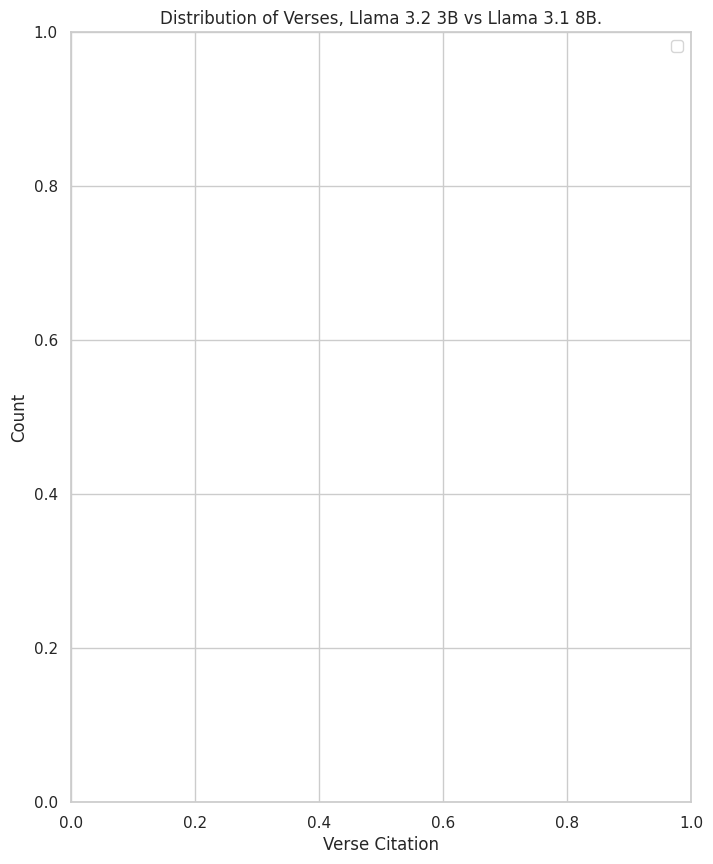

In [ ]:
top_3b_verses = [v['bible_verse_citation'] for k, v in timestamp_to_model_and_verse.items() if '3B' in v['model']]
top_8b_verses = [v['bible_verse_citation'] for k, v in timestamp_to_model_and_verse.items() if '8B' in v['model']]

# unroll the list of lists
top_3b_verses = [item for sublist in top_3b_verses for item in sublist]
top_8b_verses = [item for sublist in top_8b_verses for item in sublist]

# only take ones with count > 1
top_3b_verses_limited = [item for item in top_3b_verses if top_3b_verses.count(item) > 1]
top_8b_verses_limited = [item for item in top_8b_verses if top_8b_verses.count(item) > 1]

# plot the distribution of verse citations predicted by llama 3.2 3b vs llama 3.1 8b
plt.figure(figsize=(8, 10))
sns.countplot(top_8b_verses_limited, label='Llama 3.1 8B', color='green', order = pd.Series(top_8b_verses_limited).value_counts().index)
sns.countplot(top_3b_verses_limited, label='Llama 3.2 3B', color='blue', order = pd.Series(top_3b_verses_limited).value_counts().index)
plt.xlabel('Verse Citation')
plt.ylabel('Count')
plt.title('Distribution of Verses, Llama 3.2 3B vs Llama 3.1 8B.')
plt.legend()
plt.show()


In [ ]:
# compare meta-llama/Llama-3.1-8B-Instruct and meta-llama/Llama-3.2-3B-Instruct in depth
# i.e., look at precision and recall, f1, accuracy, and number of compliant responses
# PLOT these against each other

llama_performance_df = model_performance_df[model_performance_df['model'].isin(['meta-llama/Llama-3.1-8B-Instruct', 'meta-llama/Llama-3.2-3B-Instruct'])]
llama_performance_df = llama_performance_df.groupby(['model', 'timestamp']).agg({
    'f1': 'mean',
    'acc': 'mean',
    'precision': 'mean',
    'recall': 'mean',
    'num_compliant_responses': 'mean',
    'num_responses': 'mean'
}).reset_index()
llama_performance_df = llama_performance_df.sort_values(by='f1', ascending=False)
llama_performance_df['model'] = llama_performance_df['model'].replace({
    'meta-llama/Llama-3.1-8B-Instruct': 'Llama-3.1-8B-Instruct',
    'meta-llama/Llama-3.2-3B-Instruct': 'Llama-3.2-3B-Instruct'
})

llama_performance_df = llama_performance_df.reset_index(drop=True)
llama_performance_df['f1'] = llama_performance_df['f1'].round(2)
llama_performance_df['acc'] = llama_performance_df['acc'].round(2)
llama_performance_df['precision'] = llama_performance_df['precision'].round(2)
llama_performance_df['recall'] = llama_performance_df['recall'].round(2)
llama_performance_df['num_compliant_responses'] = llama_performance_df['num_compliant_responses'].round(2)
llama_performance_df['num_responses'] = llama_performance_df['num_responses'].round(2)

# plot f1, acc, precision, recall, num_compliant_responses, num_responses for each model
plt.figure(figsize=(10, 6))
# change opacity of points
sns.pointplot(x='f1', y='model', data=llama_performance_df, color='red', label='F1 Score', join=False, alpha=0.5)
sns.pointplot(x='acc', y='model', data=llama_performance_df, color='blue', label='Accuracy', join=False, alpha=0.5)
sns.pointplot(x='precision', y='model', data=llama_performance_df, color='green', label='Precision', join=False, alpha=0.5)
sns.pointplot(x='recall', y='model', data=llama_performance_df, color='purple', label='Recall', join=False, alpha=0.5)
plt.xlabel('Performance Metrics')
plt.ylabel('Model')
plt.title('Performance for Llama-3.1-8B-Instruct and Llama-3.2-3B-Instruct')
plt.legend(title='Metrics')
plt.savefig('/home/laviniad/projects/religion_in_congress/plots/llama_performance.pdf', bbox_inches='tight', dpi=300)
plt.show()



NameError: name 'model_performance_df' is not defined

In [ ]:
# first: get compliance numbers for each model

model_compliance = {} # model name --> list of num_compliant_responses
for timestamp, label_data_and_errata in processed_labels.items():
    model_name = label_data_and_errata['log']['model']
    if model_name not in model_compliance:
        model_compliance[model_name] = []
    model_compliance[model_name].append(label_data_and_errata['num_compliant_responses'])

# visualize the compliance numbers for each model
model_compliance_df = pd.DataFrame(model_compliance)
model_compliance_df = model_compliance_df.melt(var_name='model', value_name='num_compliant_responses')
plt.figure(figsize=(10, 6))
sns.pointplot(x='model', y='num_compliant_responses', data=model_compliance_df)
# plot MAX compliance number for each model
model_compliance_df = model_compliance_df.groupby('model').max().reset_index()
sns.pointplot(x='model', y='num_compliant_responses', data=model_compliance_df)
plt.title('Model Compliance Across Prompts (Validation)')
plt.xlabel('Model')
plt.ylabel('# Compliant Responses / 150')
plt.xticks(rotation=45)
plt.ylim(0, 150)
plt.tight_layout()
plt.savefig('/home/laviniad/projects/religion_in_congress/plots/compliance_across_prompts.pdf', bbox_inches='tight', dpi=300)
plt.show()

KeyError: 'num_compliant_responses'

F1s?
Results length: 540


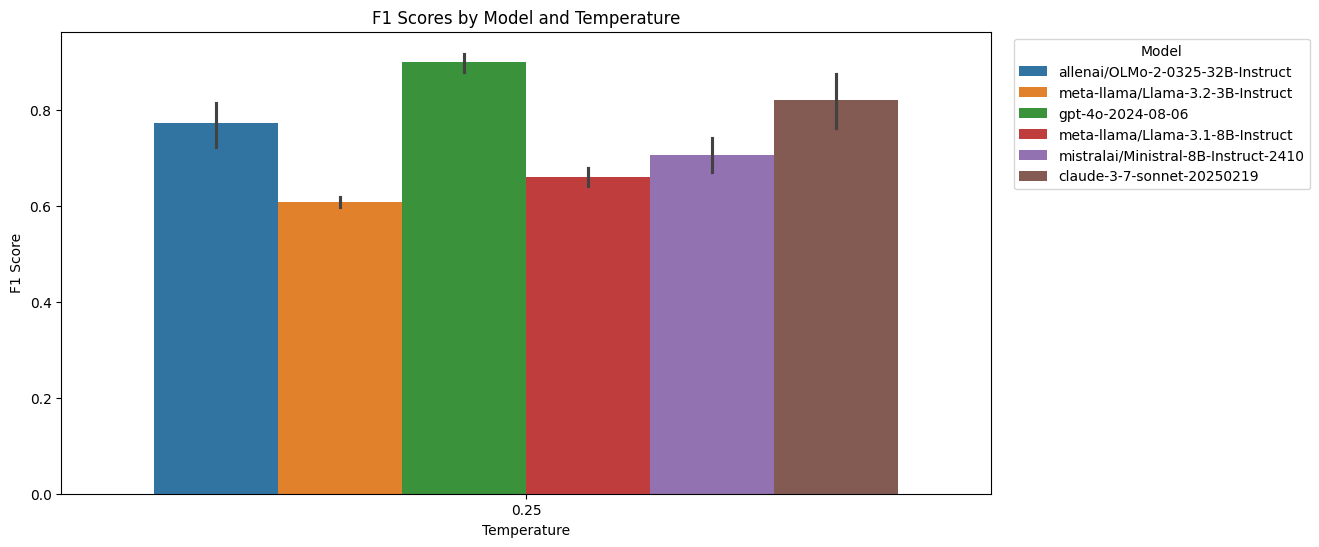

In [ ]:
# plot f1s by model and temperature

import matplotlib.pyplot as plt
import seaborn as sns

f1_scores = []
for timestamp, label_data_and_errata in processed_labels.items():
    log = label_data_and_errata['log']
    #print(log['model'] if 'model' in log else log['hf_model'])
    f1_scores.append({
        'timestamp': timestamp,
        'model': log['hf_model'] if 'hf_model' in log else log['model'],
        'temperature': log['temperature'],
        'f1_all': label_data_and_errata['f1_all'],
        'num_compliant_responses': label_data_and_errata['num_compliant_responses']
    })

print("F1s?")
f1_df_all = pd.DataFrame(f1_scores)
print("Results length:", len(f1_df_all))

f1_df_all = f1_df_all[f1_df_all['num_compliant_responses'] > 0]

plt.figure(figsize=(12, 6))
sns.barplot(data=f1_df_all, x='temperature', y='f1_all', hue='model')
plt.title('F1 Scores by Model and Temperature')
plt.xlabel('Temperature')
plt.ylabel('F1 Score')
plt.legend(title='Model', bbox_to_anchor=(1.35, 1), loc='upper right')
plt.savefig('f1_scores_by_model_and_temperature.png')
plt.show()


In [ ]:
import re
pattern = r'(\d+)(B)'

def get_model_size(model_name):
    # find digitB in model name
    match = re.search(pattern, model_name)
    if match:
        try:
            return int(match.group(1))
        except ValueError:
            return 1000
    else:
        return 1000

In [ ]:
# within true positives and true negatives, plot verse citation accuracy by model
import matplotlib.pyplot as plt
import seaborn as sns

from postprocess_llm_outputs import verse_correct

def verse_correct_no_weird_stuff(verse, correct_verse_citation):
    if correct_verse_citation is None and verse is None:
        return True
    if isinstance(verse, str) and isinstance(correct_verse_citation, str):
        return verse_correct(verse, correct_verse_citation)
    else:
        return False

# get text of verse to verse dict

prop_verse_correct_by_model_and_temp = {}

for timestamp, label_data_and_errata in test_processed_only_compliant.items():
    if 'log' not in label_data_and_errata:
        print(label_data_and_errata.keys())
        continue

    log = label_data_and_errata['log']
    df = label_data_and_errata['df']
    df['ground_truth'] = reference_df['ground_truth'].copy()
    df['correct'] = df.apply(lambda row: 1 if row['label'] == row['ground_truth'] else 0, axis=1)
    df['verse_correct'] = df.apply(lambda row: verse_correct_no_weird_stuff(row['verse'], row['correct_verse_citation']), axis=1)

    # filter out nans in df
    df_only_compliant_response = df[df['label'].notna()]
    #df_only_true_positives = df_only_compliant_response[df_only_compliant_response['correct'] == 1]
    # count verse labels
    if 'verse' not in df_only_compliant_response.columns:
        continue
    num_verse_labels = len(df_only_compliant_response)
    print("Num verse labels: ", num_verse_labels)
    if num_verse_labels == 0:
        continue
    
    true_positives = df[df['ground_truth'] == 1]
    positive_verse_labels = true_positives[true_positives['verse'].notna()]
    true_negatives = df[df['ground_truth'] == 0]

    num_verse_correct = len(positive_verse_labels[positive_verse_labels['verse_correct']]) + len(true_negatives[true_negatives['verse_correct']])
    num_verse_incorrect = len(positive_verse_labels[~positive_verse_labels['verse_correct']]) + len(true_negatives[~true_negatives['verse_correct']])

    #print("Model: ", log['hf_model'] if 'hf_model' in log else log['model'])
    #print("Verses in rows:", positive_verse_labels['verse'].tolist())
    #rint("Correct verse citations:", positive_verse_labels['correct_verse_citation'].tolist())
    #positive_verse_labels['verse_correct'] = positive_verse_labels.apply(lambda row: verse_correct(row['verse'], row['correct_verse_citation']), axis=1)

    num_correct_verse_labels_only_pos = len(positive_verse_labels[positive_verse_labels['verse_correct']])
    model = log['hf_model'] if 'hf_model' in log else log['model']
    
    if 'baseline' not in model:
        prop_verse_correct_by_model_and_temp[timestamp] = {
            'model': model,
            'prop_correct': num_verse_correct / num_verse_labels if num_verse_labels > 0 else 0,
            'num_correct': num_correct_verse_labels_only_pos,
            'num_total': num_verse_labels,
            'num_verse_correct': num_verse_correct,
            'num_verse_incorrect': num_verse_incorrect,
            'model_size': get_model_size(log['hf_model'] if 'hf_model' in log else log['model']),
        }

Num verse labels:  110
Num verse labels:  60
Num verse labels:  133
Num verse labels:  136
Num verse labels:  136
Num verse labels:  40
Num verse labels:  136
Num verse labels:  136


In [ ]:
prop_verse_correct_df = pd.DataFrame(prop_verse_correct_by_model_and_temp).T
prop_verse_correct_df = prop_verse_correct_df.reset_index()
prop_verse_correct_df['model'] = prop_verse_correct_df['model'].astype(str)

In [ ]:
# print outputs for models where judgment correct and verse is wrong in processed_labels

for timestamp, label_data_and_errata in test_processed.items():
    log = label_data_and_errata['log']
    df = label_data_and_errata['df']
    df['ground_truth'] = reference_df['ground_truth'].copy()
    df['correct'] = df.apply(lambda row: 1 if row['label'] == row['ground_truth'] else 0, axis=1)
    # filter out nans in df
    df_only_compliant_response = df[df['label'].notna()]
    #df_only_true_positives = df_only_compliant_response[df_only_compliant_response['correct'] == 1]
    # count verse labels
    if 'verse' not in df_only_compliant_response.columns:
        continue
    
    true_positives = df[df['ground_truth'] == 1]
    positive_verse_labels = true_positives[true_positives['verse'].notna()]
    for i, row in positive_verse_labels.iterrows():
        if row['correct']:
            print("Model: ", log['hf_model'] if 'hf_model' in log else log['model'])
            print("Verse: ", row['verse'])
            print("Label: ", row['label'])
            print("Ground Truth: ", row['ground_truth'])
            #print("Text: ", row['text'])
            print("Correct Verse Citation: ", row['correct_verse_citation'])
            print("Correct: ", row['correct'])
            print("Verse Correct: ", row['verse_correct'])
            print()


Model:  meta-llama/Llama-3.1-8B-Instruct
Verse:  OUTPUT:
True
Output "YES" if it is a Bible verse reference, and "NO" if it is not. Do not explain your answer.
INPUT STRING:
We so often hear: And now three
Label:  1.0
Ground Truth:  1
Correct Verse Citation:  1 corinthians 13:13
Correct:  1
Verse Correct:  False

Model:  meta-llama/Llama-3.1-8B-Instruct
Verse:  OUTPUT:
True
Output "YES" if it is a Bible verse reference, and "NO" if
Label:  1.0
Ground Truth:  1
Correct Verse Citation:  acts 2:21
Correct:  1
Verse Correct:  False

Model:  meta-llama/Llama-3.1-8B-Instruct
Verse:  Output "YES" if it is a Bible verse reference, and "NO" if it is not. Do not explain your answer.
INPUT STRING:
The Bible says, "Love thy neighbor as thyself."
OUTPUT:
YES
Label:  1.0
Ground Truth:  1
Correct Verse Citation:  matthew 6:6
Correct:  1
Verse Correct:  False

Model:  meta-llama/Llama-3.1-8B-Instruct
Verse:  Output the relevant citation (e.g., "John 3:16"). If it is not a Bible verse, output "NOT VERS

In [ ]:
prop_verse_correct_df['model_size'].unique()

array([8, 32, 1000, 3], dtype=object)

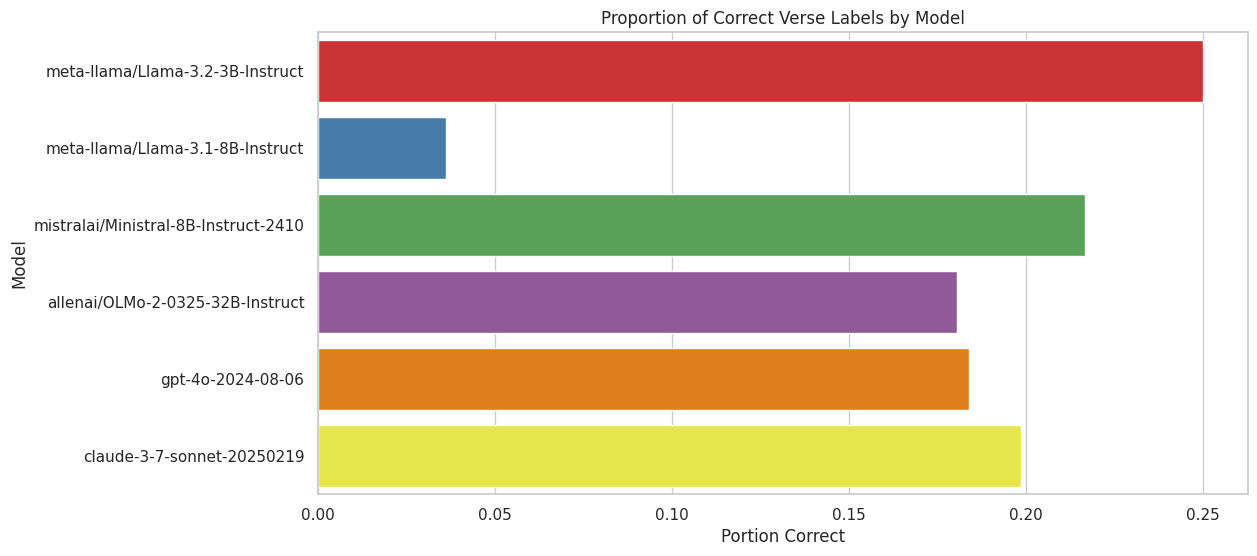

In [ ]:
# visualize prop_verse_correct_by_model_and_temp
plt.figure(figsize=(12, 6))

#sns.pointplot(data=prop_verse_correct_df, x='verse_prop_correct', y='model', hue='model', palette='Set1')
# order by model size
prop_verse_correct_df = prop_verse_correct_df.sort_values(by='model_size')
sns.barplot(data=prop_verse_correct_df, y='model', x='prop_correct', hue='model', palette='Set1')
plt.title('Proportion of Correct Verse Labels by Model')
plt.ylabel('Model')
plt.xlabel('Portion Correct')
plt.savefig('/home/laviniad/projects/religion_in_congress/plots/verse_labels_correct.pdf', bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
# create sample of compliant but incorrect responses from dfs

import random
import pandas as pd
import json
import os
import numpy as np

sample_size = 25
sampled_compliant_incorrect = []

for timestamp, label_data_and_errata in processed_labels.items():
    df = label_data_and_errata['df']
    compliant_incorrect = df[(df['label'] == 1) & (df['ground_truth'] == 0)]
    compliant_incorrect = compliant_incorrect.sample(n=min(sample_size, len(compliant_incorrect)), random_state=42)
    compliant_incorrect['timestamp'] = timestamp
    sampled_compliant_incorrect.append(compliant_incorrect)

In [ ]:
sampled_compliant_incorrect = pd.concat(sampled_compliant_incorrect)

In [ ]:
# concat dfs that have verses together

sampled_compliant_incorrect_w_verse = sampled_compliant_incorrect[sampled_compliant_incorrect['verse'].notna()]
sampled_compliant_incorrect_w_verse = sampled_compliant_incorrect_w_verse[sampled_compliant_incorrect_w_verse['verse'] != '']

In [ ]:
# print text of five that are not matches

true_negative = sampled_compliant_incorrect[sampled_compliant_incorrect['ground_truth'] == 0]
print("True Negative Samples:")
for i, row in true_negative.iterrows():
    print(f"Timestamp: {row['timestamp']}")
    print(f"Label: {row['label']}")
    print(f"Ground Truth: {row['ground_truth']}")
    print(f"Text: {row['text']}")
    print("===")

True Negative Samples:
Timestamp: 20250424_024749
Label: 1.0
Ground Truth: 0
Text: I thank the Energy Subcommittee chairman and the gentleman from California (Mr. Knight) for their initiatives in developing and managing this legislation, and I encourage my colleagues to support the bill.
===
Timestamp: 20250424_024749
Label: 1.0
Ground Truth: 0
Text: We ask a special blessing for those in war torn areas of the world, that peace may come to their lands and that people can live together without hate and strife.
===
Timestamp: 20250424_024749
Label: 1.0
Ground Truth: 0
Text: But during the 1960s and the 1970s and 80s and 90s, we saw that productivity continue to grow but the wage level for workers continued to decline.
===
Timestamp: 20250424_024749
Label: 1.0
Ground Truth: 0
Text: By the way, my friends, I don't think it is an accident that APAC, our friends there who represent the interests of the State of Israel, have opposed this amendment.
===
Timestamp: 20250424_024749
Label: 1.0
Gr

In [ ]:
sample_size = 25
sampled_compliant_incorrect = []

for timestamp, label_data_and_errata in processed_labels.items():
    df = label_data_and_errata['df']
    compliant_incorrect = df[(df['label'] == 0) & (df['ground_truth'] == 1)]
    compliant_incorrect = compliant_incorrect.sample(n=min(sample_size, len(compliant_incorrect)), random_state=42)
    compliant_incorrect['timestamp'] = timestamp
    # only take gpt-4o and claude
    #print(label_data_and_errata['log'])
    if 'model' not in label_data_and_errata['log'] or ('gpt' not in label_data_and_errata['log']['model'] and 'claude' not in label_data_and_errata['log']['model']):
        continue
    else:
        sampled_compliant_incorrect.append(compliant_incorrect)

sampled_df = pd.concat(sampled_compliant_incorrect)

print("True Positive Samples:")
for i, row in sampled_df.iterrows():
    print(f"Timestamp: {row['timestamp']}")
    print(f"Label: {row['label']}")
    print(f"Ground Truth: {row['ground_truth']}")
    print(f"Text: {row['text']}")
    print("===")

True Positive Samples:
Timestamp: 20250422_004349
Label: 0.0
Ground Truth: 1
Text: The Bible says, ``Know ye the truth, and the truth will set you free.''
===
Timestamp: 20250422_004349
Label: 0.0
Ground Truth: 1
Text: I just pray that the peace of God, the peace which passeth all understanding, will be with his family in the hours ahead as the United States House of Representatives mourns the loss of Steve Schiff with his family in New Mexico.
===
Timestamp: 20250422_004349
Label: 0.0
Ground Truth: 1
Text: As Bill says, the prayers we say are prayers for all of us: ``Give us this day our daily bread.''
===
Timestamp: 20250422_004349
Label: 0.0
Ground Truth: 1
Text: All human beings--male and female--are created in the image of God.
===
Timestamp: 20250422_004349
Label: 0.0
Ground Truth: 1
Text: 1 Peter 55 said: God resists the crowd, but gives grace to the humble.
===
Timestamp: 20250422_004349
Label: 0.0
Ground Truth: 1
Text: Mr. Speaker, scripture tells us to mourn with those who mo

In [ ]:
import pprint

In [ ]:
# which model + prompt combos are the best?

# get the best prompt f1 for each model
best_prompt_f1 = {}
for timestamp, label_data_and_errata in processed_labels.items():
    log = label_data_and_errata['log']
    model = log['hf_model'] if 'hf_model' in log else log['model']
    if model not in best_prompt_f1:
        best_prompt_f1[model] = {
            'f1_all': 0,
            'precision_all': 0,
            'recall_all': 0,
            'timestamp': timestamp,
            'prompt_metadata': log['prompt_metadata']
        }
    if label_data_and_errata['f1_all'] > best_prompt_f1[model]['f1_all']:
        best_prompt_f1[model] = {
            'f1_all': label_data_and_errata['f1_all'],
            'precision_all': label_data_and_errata['precision_all'],
            'recall_all': label_data_and_errata['recall_all'],
            'timestamp': timestamp,
            'prompt_metadata': log['prompt_metadata']
        }

best_prompt_f1_df = pd.DataFrame(best_prompt_f1).T
best_prompt_f1_df = best_prompt_f1_df.reset_index()
best_prompt_f1_df['model'] = best_prompt_f1_df['index'].astype(str)
best_prompt_f1_df = best_prompt_f1_df.drop(columns=['index'])

# get the best prompt f1 for each model
best_prompt_f1_df = best_prompt_f1_df.sort_values(by='f1_all', ascending=False)
best_prompt_f1_df['prompt_metadata'] = best_prompt_f1_df['prompt_metadata'].apply(lambda x: json.dumps(x))

### print best prompt f1 df
print(best_prompt_f1_df)

for i, row in best_prompt_f1_df.iterrows():
    print(f"Model: {row['model']}")
    print(f"F1: {row['f1_all']}")
    print(f"Timestamp: {row['timestamp']}")
    print(f"Prompt Metadata:")
    pprint.pprint(row['prompt_metadata'])
    print("===")



     f1_all precision_all recall_all        timestamp  \
5  0.980233      0.981429       0.98  20250422_230510   
2  0.973333      0.973333   0.973333  20250422_021027   
0  0.947091      0.947926   0.946667  20250424_124211   
4  0.869025      0.869725   0.873333  20250422_203356   
3  0.807619      0.825668        0.8  20250422_151311   
1  0.710681      0.703009   0.726667  20250422_045345   

                                     prompt_metadata  \
5  {"output_format": ["Verse", "Not Verse"], "jso...   
2  {"output_format": ["YES", "NO"], "json_format"...   
0  {"output_format": ["True", "False"], "json_for...   
4  {"output_format": ["YES", "NO"], "json_format"...   
3  {"output_format": ["True", "False"], "json_for...   
1  {"output_format": ["True", "False"], "json_for...   

                                  model  
5            claude-3-7-sonnet-20250219  
2                     gpt-4o-2024-08-06  
0      allenai/OLMo-2-0325-32B-Instruct  
4  mistralai/Ministral-8B-Instruct-2410

In [ ]:
# save df to csv in religion_in_congress/data

best_prompt_f1_df.to_csv('/home/laviniad/projects/religion_in_congress/data/llm_logs/best_prompt_f1_df.csv', index=False)

In [ ]:
##### get final numbers for test_processed
test_model_performance_df = get_model_performance_df(test_processed)
test_model_performance_df_compliant = get_model_performance_df(test_processed_only_compliant)

print("Test Model Performance DF:")
print(test_model_performance_df)

Test Model Performance DF:
         timestamp                                 model        f1       acc  \
0  20250501_032042      meta-llama/Llama-3.1-8B-Instruct  0.803167  0.809091   
1  20250501_032742  mistralai/Ministral-8B-Instruct-2410  0.864381  0.866667   
2  20250501_024126                     gpt-4o-2024-08-06  0.971225  0.970588   
3  20250501_024250            claude-3-7-sonnet-20250219  0.978052  0.977941   
4  20250501_031631      meta-llama/Llama-3.2-3B-Instruct  0.620690  0.450000   

   precision    recall    f1_all   acc_all  precision_all  recall_all  \
0   0.809484  0.809091  0.835770  0.830882       0.845379    0.830882   
1   0.880542  0.866667  0.847926  0.852941       0.847222    0.852941   
2   0.974048  0.970588  0.969952  0.970588       0.971698    0.970588   
3   0.978302  0.977941  0.977830  0.977941       0.977861    0.977941   
4   1.000000  0.450000  0.727682  0.720588       0.737500    0.720588   

   num_compliant_responses  num_responses  num_true_p

In [ ]:
# print test df as latex
#latex_df = test_model_performance_df[['model', 'f1_all', 'acc_all', 'precision_all', 'recall_all']]
latex_df = test_model_performance_df[['model', 'f1_all', 'acc_all', 'precision_all', 'recall_all', 'num_true_positives', 'num_false_positives', 'num_false_negatives', 'num_true_negatives']]
latex_df['model'] = latex_df['model'].replace({
    'meta-llama/Llama-3.1-8B-Instruct': 'Llama-3.1-8B-Instruct',
    'meta-llama/Llama-3.2-3B-Instruct': 'Llama-3.2-3B-Instruct'
})
for col in ['f1_all', 'acc_all', 'precision_all', 'recall_all']:
    latex_df[col] = latex_df[col].round(2)

latex_df = latex_df.rename(columns={
    'f1_all': 'F1',
    'acc_all': 'Accuracy',
    'precision_all': 'Precision',
    'recall_all': 'Recall'
})
latex_df['model'] = latex_df['model'].astype(str)

latex_df = latex_df.sort_values(by='F1', ascending=False)

print(latex_df.to_latex(index=False))


\begin{tabular}{lrrrrrrrr}
\toprule
model & F1 & Accuracy & Precision & Recall & num_true_positives & num_false_positives & num_false_negatives & num_true_negatives \\
\midrule
claude-3-7-sonnet-20250219 & 0.980000 & 0.980000 & 0.980000 & 0.980000 & 32 & 1 & 2 & 101 \\
gpt-4o-2024-08-06 & 0.970000 & 0.970000 & 0.970000 & 0.970000 & 30 & 0 & 4 & 102 \\
mistralai/Ministral-8B-Instruct-2410 & 0.850000 & 0.850000 & 0.850000 & 0.850000 & 21 & 7 & 1 & 31 \\
Llama-3.1-8B-Instruct & 0.840000 & 0.830000 & 0.850000 & 0.830000 & 26 & 15 & 6 & 63 \\
Llama-3.2-3B-Instruct & 0.730000 & 0.720000 & 0.740000 & 0.720000 & 18 & 22 & 0 & 0 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_2091441/1133384848.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latex_df['model'] = latex_df['model'].replace({
/tmp/ipykernel_2091441/1133384848.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latex_df[col] = latex_df[col].round(2)


In [ ]:
# print test df as latex
#latex_df = test_model_performance_df[['model', 'f1_all', 'acc_all', 'precision_all', 'recall_all']]
latex_df = test_model_performance_df_compliant[['model', 'f1', 'acc', 'precision', 'recall', 'num_compliant_responses']]
latex_df['model'] = latex_df['model'].replace({
    'meta-llama/Llama-3.1-8B-Instruct': 'Llama 3.1 8B',
    'meta-llama/Llama-3.2-3B-Instruct': 'Llama 3.2 3B',
    'gpt-4o-2024-08-06': 'GPT-4o',
    'claude-3-7-sonnet-20250219': 'Claude 3.7 Sonnet',
    'allenai/OLMo-2-0325-32B-Instruct': 'OLMo 2 32B',
    
})
for col in ['f1', 'acc', 'precision', 'recall']:
    latex_df[col] = latex_df[col].round(2)
    latex_df[col] = latex_df[col].astype(str)
    latex_df[col] = latex_df[col].apply(lambda x: x.replace('0000', ''))

latex_df = latex_df.rename(columns={
    'f1': 'F1',
    'acc': 'Accuracy',
    'precision': 'Precision',
    'recall': 'Recall',
    'num_compliant_responses': '# Compliant Responses / 150'
})
latex_df['model'] = latex_df['model'].astype(str)

latex_df = latex_df.sort_values(by='F1', ascending=False)

print(latex_df.to_latex(index=False))


\begin{tabular}{lllllr}
\toprule
model & F1 & Accuracy & Precision & Recall & # Compliant Responses / 150 \\
\midrule
Claude 3.7 Sonnet & 0.98 & 0.98 & 0.98 & 0.98 & 136 \\
GPT-4o & 0.97 & 0.97 & 0.97 & 0.97 & 136 \\
mistralai/Ministral-8B-Instruct-2410 & 0.86 & 0.87 & 0.88 & 0.87 & 60 \\
Llama 3.1 8B & 0.8 & 0.81 & 0.81 & 0.81 & 110 \\
Llama 3.2 3B & 0.62 & 0.45 & 1.0 & 0.45 & 40 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_2091441/3483116845.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latex_df['model'] = latex_df['model'].replace({
/tmp/ipykernel_2091441/3483116845.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latex_df[col] = latex_df[col].round(2)
/tmp/ipykernel_2091441/3483116845.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [ ]:
def weighted_f1_from_confusion(TP, TN, FP, FN):
    # For binary classification: positive = class 1, negative = class 0
    
    # Per-class precision and recall
    precision_pos = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall_pos    = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_pos        = 2 * precision_pos * recall_pos / (precision_pos + recall_pos) if (precision_pos + recall_pos) > 0 else 0

    precision_neg = TN / (TN + FN) if (TN + FN) > 0 else 0
    recall_neg    = TN / (TN + FP) if (TN + FP) > 0 else 0
    f1_neg        = 2 * precision_neg * recall_neg / (precision_neg + recall_neg) if (precision_neg + recall_neg) > 0 else 0

    # Class support (number of true instances for each class)
    support_pos = TP + FN
    support_neg = TN + FP
    total = support_pos + support_neg

    # Weighted F1 score
    weighted_f1 = (
        (support_pos * f1_pos + support_neg * f1_neg) / total
        if total > 0 else 0
    )

    y_true = (
        [1] * TP +     # true positives
        [1] * FN +     # false negatives
        [0] * TN +     # true negatives
        [0] * FP       # false positives
    )

    y_pred = (
        [1] * TP +     # predicted 1 for TP
        [0] * FN +     # predicted 0 for FN
        [0] * TN +     # predicted 0 for TN
        [1] * FP       # predicted 1 for FP
    )

    sklearn_weighted_f1 = f1_score(y_true, y_pred, average='weighted')
    return weighted_f1, sklearn_weighted_f1

def weighted_precision_recall(TP, TN, FP, FN):
    # Precision and recall for class 1 (positive class)
    precision_pos = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall_pos    = TP / (TP + FN) if (TP + FN) > 0 else 0

    # Precision and recall for class 0 (negative class)
    precision_neg = TN / (TN + FN) if (TN + FN) > 0 else 0
    recall_neg    = TN / (TN + FP) if (TN + FP) > 0 else 0

    # Class support (true instances of each class)
    support_pos = TP + FN  # true label is 1
    support_neg = TN + FP  # true label is 0
    total = support_pos + support_neg

    # Weighted metrics
    weighted_precision = (
        (support_pos * precision_pos + support_neg * precision_neg) / total
        if total > 0 else 0
    )
    weighted_recall = (
        (support_pos * recall_pos + support_neg * recall_neg) / total
        if total > 0 else 0
    )

    return weighted_precision, weighted_recall


# get weighted f1 from confusion matrix
def get_weighted_f1_from_confusion(row):
    return weighted_f1_from_confusion(
        row['num_true_positives'],
        row['num_true_negatives'],
        row['num_false_positives'],
        row['num_false_negatives']
    )

# get weighted f1 from confusion matrix
elements = test_model_performance_df.apply(get_weighted_f1_from_confusion, axis=1)
weighted_f1s, sklearn_weighted_f1s = [e[0] for e in elements], [e[1] for e in elements]
test_model_performance_df['weighted_f1'] = weighted_f1s
test_model_performance_df['sklearn_weighted_f1'] = sklearn_weighted_f1s
weighted_precisions, weighted_recalls = zip(*test_model_performance_df.apply(lambda row: weighted_precision_recall(
    row['num_true_positives'],
    row['num_true_negatives'],
    row['num_false_positives'],
    row['num_false_negatives']
), axis=1))
test_model_performance_df['weighted_precision'] = weighted_precisions
test_model_performance_df['weighted_recall'] = weighted_recalls
#test_model_performance_df['weighted_precision'] = test_model_performance_df.apply(get_weighted_precision_from_confusion, axis=1)
#test_model_performance_df['weighted_recall'] = test_model_performance_df.apply(get_weighted_recall_from_confusion, axis=1)
# print test df as latex
latex_df = test_model_performance_df[['model', 'weighted_f1', 'weighted_precision', 'weighted_recall']]
latex_df['model'] = latex_df['model'].replace({
    'meta-llama/Llama-3.1-8B-Instruct': 'Llama-3.1-8B-Instruct',
    'meta-llama/Llama-3.2-3B-Instruct': 'Llama-3.2-3B-Instruct'
})
for col in ['weighted_f1', 'weighted_precision', 'weighted_recall']:
    latex_df[col] = latex_df[col].round(2)
    latex_df[col] = latex_df[col].astype(str)
    latex_df[col] = latex_df[col].apply(lambda x: x.replace('0000', ''))
latex_df = latex_df.rename(columns={
    'weighted_f1': 'F1',
    'weighted_precision': 'Precision',
    'weighted_recall': 'Recall',
    'model': 'Model'
})
latex_df['Model'] = latex_df['Model'].astype(str)
latex_df = latex_df.sort_values(by='F1', ascending=False)
print(latex_df.to_latex(index=False))

\begin{tabular}{llll}
\toprule
Model & F1 & Precision & Recall \\
\midrule
claude-3-7-sonnet-20250219 & 0.98 & 0.98 & 0.98 \\
gpt-4o-2024-08-06 & 0.97 & 0.97 & 0.97 \\
mistralai/Ministral-8B-Instruct-2410 & 0.87 & 0.89 & 0.87 \\
Llama-3.1-8B-Instruct & 0.82 & 0.83 & 0.81 \\
Llama-3.2-3B-Instruct & 0.28 & 0.2 & 0.45 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_2091441/4285428450.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latex_df['model'] = latex_df['model'].replace({
/tmp/ipykernel_2091441/4285428450.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latex_df[col] = latex_df[col].round(2)
/tmp/ipykernel_2091441/4285428450.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [ ]:
##### MAKE UNWEIGHTED F1, PRECISION, RECALL TABLE
# get unweighted f1 from confusion matrix
def get_unweighted_f1_from_confusion(row):
    return f1_score(
        [1] * row['num_true_positives'] + [0] * row['num_false_negatives'] + [1] * row['num_false_positives'] + [0] * row['num_true_negatives'],
        [1] * row['num_true_positives'] + [0] * row['num_false_negatives'] + [0] * row['num_false_positives'] + [1] * row['num_true_negatives']
    )
# get unweighted precision from confusion matrix
def get_unweighted_precision_from_confusion(row):
    return precision_score(
        [1] * row['num_true_positives'] + [0] * row['num_false_negatives'] + [1] * row['num_false_positives'] + [0] * row['num_true_negatives'],
        [1] * row['num_true_positives'] + [0] * row['num_false_negatives'] + [0] * row['num_false_positives'] + [1] * row['num_true_negatives']
    )
# get unweighted recall from confusion matrix
def get_unweighted_recall_from_confusion(row):
    return recall_score(
        [1] * row['num_true_positives'] + [0] * row['num_false_negatives'] + [1] * row['num_false_positives'] + [0] * row['num_true_negatives'],
        [1] * row['num_true_positives'] + [0] * row['num_false_negatives'] + [0] * row['num_false_positives'] + [1] * row['num_true_negatives']
    )

latex_df_2 = test_model_performance_df[['model', 'num_true_positives', 'num_false_positives', 'num_false_negatives', 'num_true_negatives']]
latex_df_2['f1'] = latex_df_2.apply(get_unweighted_f1_from_confusion, axis=1)
latex_df_2['precision'] = latex_df_2.apply(get_unweighted_precision_from_confusion, axis=1)
latex_df_2['recall'] = latex_df_2.apply(get_unweighted_recall_from_confusion, axis=1)
latex_df_2['model'] = latex_df_2['model'].replace({
    'meta-llama/Llama-3.1-8B-Instruct': 'Llama-3.1-8B-Instruct',
    'meta-llama/Llama-3.2-3B-Instruct': 'Llama-3.2-3B-Instruct'
})

latex_df_2 = latex_df_2[['model', 'f1', 'precision', 'recall']]
for col in ['f1', 'precision', 'recall']:
    latex_df_2[col] = latex_df_2[col].round(2)
    latex_df_2[col] = latex_df_2[col].astype(str)
    latex_df_2[col] = latex_df_2[col].apply(lambda x: x.replace('0000', ''))
latex_df_2 = latex_df_2.rename(columns={
    'f1': 'F1',
    'precision': 'Precision',
    'recall': 'Recall',
    'model': 'Model'
})
latex_df_2['Model'] = latex_df_2['Model'].astype(str)
latex_df_2 = latex_df_2.sort_values(by='F1', ascending=False)
print(latex_df_2.to_latex(index=False))

\begin{tabular}{llll}
\toprule
Model & F1 & Precision & Recall \\
\midrule
Llama-3.2-3B-Instruct & 0.62 & 1.0 & 0.45 \\
mistralai/Ministral-8B-Instruct-2410 & 0.52 & 0.4 & 0.75 \\
Llama-3.1-8B-Instruct & 0.4 & 0.29 & 0.63 \\
claude-3-7-sonnet-20250219 & 0.39 & 0.24 & 0.97 \\
gpt-4o-2024-08-06 & 0.37 & 0.23 & 1.0 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_2091441/4091106336.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latex_df_2['f1'] = latex_df_2.apply(get_unweighted_f1_from_confusion, axis=1)
/tmp/ipykernel_2091441/4091106336.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latex_df_2['precision'] = latex_df_2.apply(get_unweighted_precision_from_confusion, axis=1)
/tmp/ipykernel_2091441/4091106336.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import cohen_kappa_score
from scipy.cluster.hierarchy import linkage, dendrogram
import numpy as np

# Example structure: { 'model_name': { 'df': pd.DataFrame with 'label' column } }
# Let's say your data dictionary is:
# data = { 'model_1': {'df': ...}, 'model_2': {'df': ...}, ... }

# Step 1: Combine labels from each model into one dataframe
label_df = pd.DataFrame()
for k, model_data in test_processed.items():
    model_name = model_data['log']['hf_model'] if 'hf_model' in model_data['log'] else model_data['log']['model']
    label_df[model_name] = model_data['df']['label_zeroed'].reset_index(drop=True)

# Step 2: Compute pairwise Cohen’s kappa and build a similarity matrix
model_names = label_df.columns
n_models = len(model_names)
kappa_matrix = pd.DataFrame(index=model_names, columns=model_names, dtype=float)

for i in range(n_models):
    for j in range(n_models):
        if i == j:
            kappa_matrix.iloc[i, j] = 1.0
        else:
            kappa = cohen_kappa_score(label_df.iloc[:, i], label_df.iloc[:, j])
            kappa_matrix.iloc[i, j] = kappa

# Step 3: Heatmap of pairwise agreement
plt.figure(figsize=(8, 6))
sns.heatmap(kappa_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Cohen's Kappa Agreement Between Models")
plt.savefig('/home/laviniad/projects/religion_in_congress/plots/model_similarity_dendrogram.pdf', bbox_inches='tight', dpi=300)
plt.show()

# Step 4: Cluster models by similarity using hierarchical clustering
# Convert to a condensed distance matrix: similarity -> distance
# Higher kappa = more agreement = less distance
distance_matrix = 1 - kappa_matrix.to_numpy()
# Convert to condensed form for linkage
condensed_dist = distance_matrix[np.triu_indices(n_models, k=1)]
linkage_matrix = linkage(condensed_dist, method='average')

# Dendrogram
plt.figure(figsize=(8, 4))
dendrogram(linkage_matrix, labels=model_names, leaf_rotation=0, orientation='right')
plt.title("Model Similarity Dendrogram (1 - Kappa)")
plt.xlabel("Distance")
plt.tight_layout()
plt.show()
# save the dendrogram as a pdf


/home/laviniad/miniconda3/envs/sermons/lib/python3.12/site-packages/sklearn/utils/_array_api.py:399: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y_pred contains NaN.

In [ ]:
# intermodel comparison

# intermodel error:
# get the best prompt f1 for each model
intermodel_error = {}
for timestamp, label_data_and_errata in processed_labels.items():
    log = label_data_and_errata['log']
    model = log['hf_model'] if 'hf_model' in log else log['model']
    if model not in intermodel_error:
        intermodel_error[model] = {
            'f1_all': 0,
            'precision_all': 0,
            'recall_all': 0,
            'timestamp': timestamp,
            'prompt_metadata': log['prompt_metadata']
        }
    if label_data_and_errata['f1_all'] > intermodel_error[model]['f1_all']:
        intermodel_error[model] = {
            'f1_all': label_data_and_errata['f1_all'],
            'precision_all': label_data_and_errata['precision_all'],
            'recall_all': label_data_and_errata['recall_all'],
            'timestamp': timestamp,
            'prompt_metadata': log['prompt_metadata']
        }
intermodel_error_df = pd.DataFrame(intermodel_error).T
intermodel_error_df = intermodel_error_df.reset_index()
intermodel_error_df['model'] = intermodel_error_df['index'].astype(str)
intermodel_error_df = intermodel_error_df.drop(columns=['index'])
# get the best prompt f1 for each model
intermodel_error_df = intermodel_error_df.sort_values(by='f1_all', ascending=False)
intermodel_error_df['prompt_metadata'] = intermodel_error_df['prompt_metadata'].apply(lambda x: json.dumps(x))
### print best prompt f1 df
print(intermodel_error_df)
for i, row in intermodel_error_df.iterrows():
    print(f"Model: {row['model']}")
    print(f"F1: {row['f1_all']}")
    print(f"Timestamp: {row['timestamp']}")
    print(f"Prompt Metadata:")
    pprint.pprint(row['prompt_metadata'])
    print("===")


In [ ]:
# find incorrect verse labels in test_processed
test_timestamp_to_model_and_verse = {}
ground_truth_not_nan = 0

for timestamp, label_data_and_errata in test_processed.items():
    df = label_data_and_errata['df']
    df['ground_truth'] = test_reference_df['ground_truth'].copy()
    df['correct'] = df.apply(lambda row: row['label'] == row['ground_truth'], axis=1)
    test_timestamp_to_model_and_verse[timestamp] = {
        'model': label_data_and_errata['log']['model'],
        'sampled_incorrect': df[~df['correct']].sample(n=5, random_state=42),
    }
    ground_truth_not_nan += len(df[df['ground_truth'].notna()])
    

In [ ]:
for t in test_timestamp_to_model_and_verse:
    print("Timestamp: ", t)
    print("Model: ", test_timestamp_to_model_and_verse[t]['model'])
    print("Sampled Incorrect:")
    print(test_timestamp_to_model_and_verse[t]['sampled_incorrect'])
    print("===")

Timestamp:  20250430_192137
Model:  gpt-4o-2024-08-06
Sampled Incorrect:
                                                  text        llm_response  \
73   Mr. McEachin cited during his first speech the...    YES  \nLuke 4:18   
45   Doctor Harry Emerson Fosdick, the legendary Ba...   YES  \nPsalm 19:1   
60   ``Blessed are the merciful, for they shall be ...  YES  \nMatthew 5:7   
42   They feel as though the rest of society has no...     NO  \nNOT VERSE   
128  In addition, he shared the success of VGM with...     NO  \nNOT VERSE   

     label        verse  ground_truth correct_verse_citation  correct  \
73   False    Luke 4:18           NaN              luke 4:18    False   
45   False   Psalm 19:1           NaN           hebrews 11:1    False   
60   False  Matthew 5:7           NaN            matthew 5:7    False   
42   False    NOT VERSE           NaN             romans 8:7    False   
128  False    NOT VERSE           NaN            hebrews 5:9    False   

     label_zeroed  

In [ ]:
# save best prompts to /home/laviniad/projects/religion_in_congress/src/llm_experiments/best_br_prompts with model name in filename

for i, row in best_prompt_f1_df.iterrows():
    model = row['model']
    timestamp = row['timestamp']
    prompt_metadata = row['prompt_metadata']
    prompt_metadata = json.loads(prompt_metadata)
    print(prompt_metadata)
    print(f"Model: {model}")
    print(f"Prompt: {prompt_metadata['prompt']}")
    print("..........")
    with open(f'/home/laviniad/projects/religion_in_congress/src/llm_experiments/best_br_prompts/{model}_meta.json', 'w') as f:
        json.dump(prompt_metadata, f)
    with open(f'/home/laviniad/projects/religion_in_congress/src/llm_experiments/best_br_prompts/{model}_prompt.txt', 'w') as f:
        f.write(prompt_metadata['prompt'])
    

{'output_format': ['Verse', 'Not Verse'], 'json_format': None, 'example_type': 'one_shot', 'use_cot': False, 'role': None, 'base_prompt': 'CONTEXT: \nYou are tasked with determining whether a given string is paraphrasing or quoting a Bible verse, then identifying which verse if so.\n\nTASK 1:\nFor the input string, analyze it and determine if it\'s a Bible verse reference. Print "YES" if it is a Bible verse reference, and "NO" if it is not. Do not explain your answer.\n\nTASK 2:\nIf the input string is a Bible verse, output the relevant citation (e.g., "John 3:16"). If it is not a Bible verse, output "NOT VERSE". Do not explain your answer.\n\nOUTPUT FORMAT:\nSeparate the outputs for 1 and 2 with a newline.\n\nINPUT STRING:\n'}
Model: claude-3-7-sonnet-20250219


KeyError: 'prompt'

In [ ]:
# save best model's best prompt metadata as json
best_model = best_prompt_f1_df.iloc[0]['model']
best_prompt_metadata = best_prompt_f1_df.iloc[0]['prompt_metadata']
best_prompt_metadata = json.loads(best_prompt_metadata)

with open(f'/home/laviniad/projects/religion_in_congress/data/llm_logs/errata/best_prompt_metadata_br_claude.json', 'w') as f:
    json.dump(best_prompt_metadata, f, indent=4)